# Trabajo Práctico 1 - Ejercicio 1 - Visualización de Datos
## <center> Grupo 07 </center>
### <center> Integrantes: </center>
<center>

Leandro Elias Brizuela

José Rafael Patty Morales

Jesabel Pugliese

Candela Matelica
</center>

## Inicialización del entorno

In [1]:
# Manipulación de datos y funciones matemáticas
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as psp
from IPython.display import display

# Importación de datos
import pyarrow.parquet as pq

# Modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor


## Importación de datos

In [2]:
!gdown 1idXm6LK6H4yVOsPJMq9k_33gUG-DeEdk
!gdown 1cmVWBJRhiaP0fszjWbGrAM4QF5s9vPEu
!gdown 1-Z1MVMaFuu-x6MlQlf4w9nJuiHn-6gS7

!gdown 1J-pTzCxssC7GMM_nl0uRE_vZwbmvQsVf

!gdown 1yaAz2seD3m20S7D9YPbqX9IL5luA92T_

#trips con datos y columnas filtradas
!gdown 1ynZlE_uiee-YqxAue5343TlYKt5nWJxJ

Downloading...
From: https://drive.google.com/uc?id=1idXm6LK6H4yVOsPJMq9k_33gUG-DeEdk
To: /content/yellow_tripdata_2024-01.parquet
100% 50.0M/50.0M [00:00<00:00, 85.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cmVWBJRhiaP0fszjWbGrAM4QF5s9vPEu
To: /content/yellow_tripdata_2024-02.parquet
100% 50.3M/50.3M [00:00<00:00, 70.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Z1MVMaFuu-x6MlQlf4w9nJuiHn-6gS7
To: /content/yellow_tripdata_2024-03.parquet
100% 60.1M/60.1M [00:00<00:00, 213MB/s]
Downloading...
From: https://drive.google.com/uc?id=1J-pTzCxssC7GMM_nl0uRE_vZwbmvQsVf
To: /content/taxi_zone_lookup.csv
100% 12.3k/12.3k [00:00<00:00, 25.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1yaAz2seD3m20S7D9YPbqX9IL5luA92T_
From (redirected): https://drive.google.com/uc?id=1yaAz2seD3m20S7D9YPbqX9IL5luA92T_&confirm=t&uuid=36f3947c-8cfa-4267-a5db-35b996dbcc16
To: /content/datos_filtrados.csv
100% 943M/943M [00:09<00:00, 104MB/s]
Downloading...
From 

In [3]:
trips_1 = pq.read_table('/content/yellow_tripdata_2024-01.parquet')
trips_january = trips_1.to_pandas()
trips_2 = pq.read_table('/content/yellow_tripdata_2024-02.parquet')
trips_february = trips_2.to_pandas()
trips_3 = pq.read_table('/content/yellow_tripdata_2024-03.parquet')
trips_march = trips_3.to_pandas()

taxi_zone = pd.read_csv('/content/taxi_zone_lookup.csv')

trips = pd.concat([trips_january, trips_february, trips_march], axis = 0, ignore_index = True)

## Exploración de datos

In [ ]:
# Visualizamos la cantidad de filas y columnas del dataframe:

shape = trips.shape
print("Cantidad de filas: ", shape[0])
print("Cantidad de columnas: ", shape[1])

Cantidad de filas:  9554778
Cantidad de columnas:  19


In [ ]:
# Visualizamos las distintas columnas del dataframe y su tipo de datos:

trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554778 entries, 0 to 9554777
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [ ]:
# Visualizamos algunas filas del dataframe:

pd.concat([trips.head(5), trips.tail(5)])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
9554773,2,2024-03-31 23:16:45,2024-03-31 23:29:20,NaN,4.27,NaN,None,130,218,0,14.27,0.0,0.5,0.00,0.0,1.0,15.77,NaN,NaN
9554774,1,2024-03-31 23:29:28,2024-03-31 23:43:47,NaN,0.00,NaN,None,79,100,0,14.00,1.0,0.5,3.80,0.0,1.0,24.80,NaN,NaN
9554775,2,2024-03-31 23:15:00,2024-03-31 23:47:29,NaN,6.44,NaN,None,63,181,0,30.00,0.0,0.5,0.00,0.0,1.0,31.50,NaN,NaN
9554776,2,2024-03-31 23:27:53,2024-03-31 23:45:44,NaN,3.88,NaN,None,161,148,0,22.32,0.0,0.5,5.26,0.0,1.0,31.58,NaN,NaN
9554777,2,2024-03-31 23:10:50,2024-03-31 23:31:59,NaN,7.39,NaN,None,95,7,0,31.47,0.0,0.5,0.00,0.0,1.0,32.97,NaN,NaN


In [ ]:
# Visualizamos la cantidad de datos nulos por columna en el dataframe:

print(trips.isna().sum())

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          751962
trip_distance                 0
RatecodeID               751962
store_and_fwd_flag       751962
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     751962
Airport_fee              751962
dtype: int64


In [ ]:
# Visualizamos la cantidad de NO nulos por columna en el dataframe:

print(trips.count())

VendorID                 9554778
tpep_pickup_datetime     9554778
tpep_dropoff_datetime    9554778
passenger_count          8802816
trip_distance            9554778
RatecodeID               8802816
store_and_fwd_flag       8802816
PULocationID             9554778
DOLocationID             9554778
payment_type             9554778
fare_amount              9554778
extra                    9554778
mta_tax                  9554778
tip_amount               9554778
tolls_amount             9554778
improvement_surcharge    9554778
total_amount             9554778
congestion_surcharge     8802816
Airport_fee              8802816
dtype: int64


#### Visualizaremos algunas variables para tener un mejor contexto de los datos

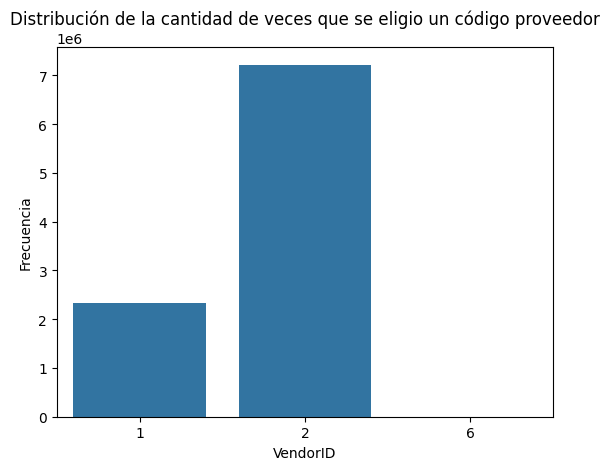

In [ ]:
# Visualizamos la frecuencia de VendorID

sns.countplot(data = trips, x = "VendorID")
plt.title("Distribución de la cantidad de veces que se eligio un código proveedor")
plt.xlabel("VendorID")
plt.ylabel("Frecuencia")
plt.show()

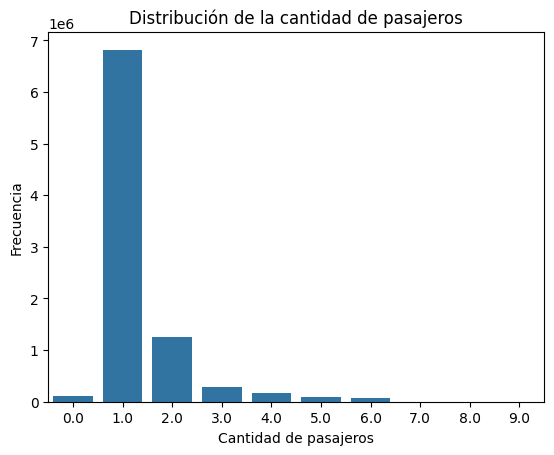

In [ ]:
# Visualizamos la frecuencia de passenger_count

sns.countplot(data = trips, x = "passenger_count")
plt.title("Distribución de la cantidad de pasajeros")
plt.xlabel("Cantidad de pasajeros")
plt.ylabel("Frecuencia")
plt.show()

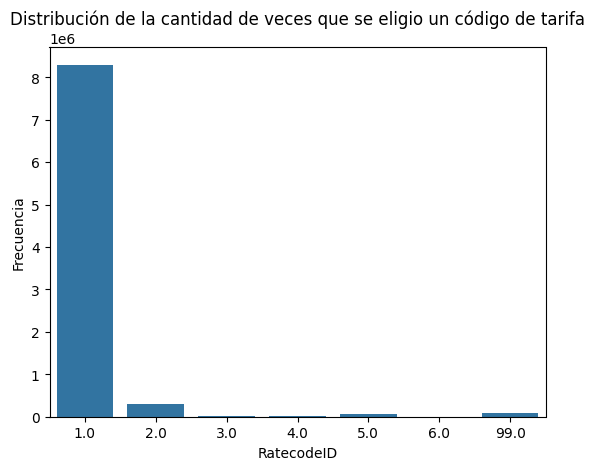

In [ ]:
# Visualizamos la frecuencia de RatecodeID

sns.countplot(data = trips, x = "RatecodeID")
plt.title("Distribución de la cantidad de veces que se eligio un código de tarifa")
plt.xlabel("RatecodeID")
plt.ylabel("Frecuencia")
plt.show()

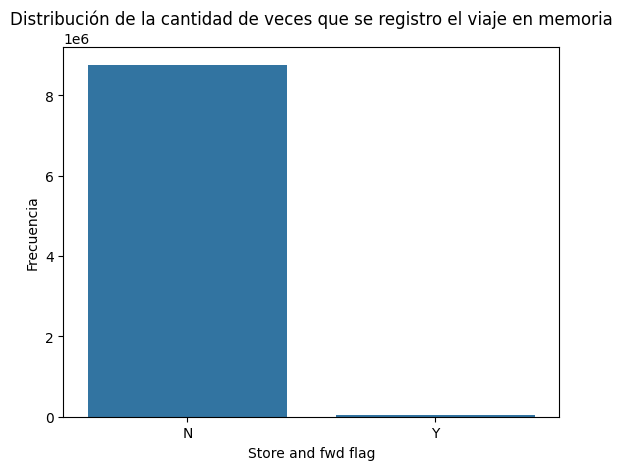

In [ ]:
# Visualizamos la frecuencia de store_and_fwd_flag

sns.countplot(data = trips, x = "store_and_fwd_flag")
plt.title("Distribución de la cantidad de veces que se registro el viaje en memoria")
plt.xlabel("Store and fwd flag")
plt.ylabel("Frecuencia")
plt.show()

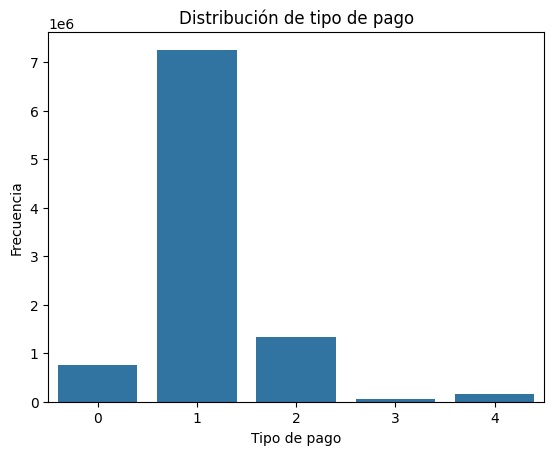

In [ ]:
# Visualizamos la frecuencia de payment_type

sns.countplot(data = trips, x = "payment_type")
plt.title("Distribución de tipo de pago")
plt.xlabel("Tipo de pago")
plt.ylabel("Frecuencia")
plt.show()

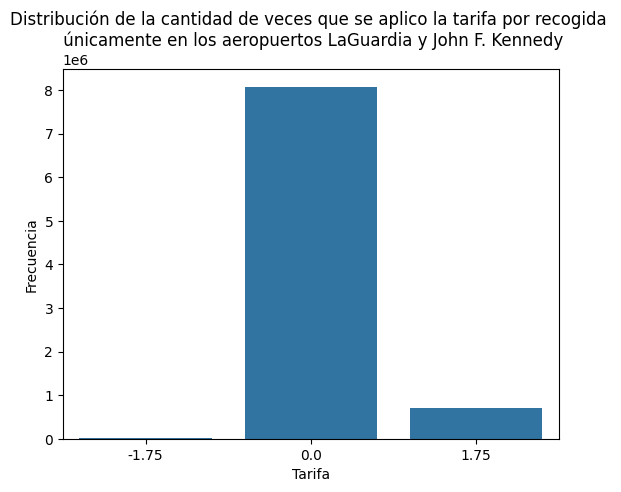

In [ ]:
# Visualizamos la frecuencia de Airport_fee

sns.countplot(data = trips, x = "Airport_fee")
plt.title("Distribución de la cantidad de veces que se aplico la tarifa por recogida \n únicamente en los aeropuertos LaGuardia y John F. Kennedy")
plt.xlabel("Tarifa")
plt.ylabel("Frecuencia")
plt.show()

**Observación**: Las variables cuantitativas continuas, no fueron graficadas, ya que eran poco representativas para poder extraer información, más allá de que mostraban valores atípicos.

## Análisis de las variables



Se trabajó sobre un subconjunto (enero, febrero y marzo de 2024) de datos de viajes en taxis: [Yellow Cab USA](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Las variables sobre las cuales vamos a trabajar son las siguientes:

Primero se definirán las categóricas:
- **VendorID**:
Es un código que indica el proveedor de TPEP que suministró el registro. Esta variable puede tomar los valores:
  - $1 =$ *Creative Mobile Technologies, LLC*
  - $2 =$ *VeriFone Inc*.
  
  - **Tipo**: *Categórica numérica nominal*, ya que cada número representa una categoría de TPEP diferente pero no sigue un orden ni una jerarquía específica.

  - **Tipo de dato**: *int32*

- **RatecodeID**: El código de tarifa final aplicado al terminar el viaje. Esta variable puede tomar los valores:
  - $1 =$ *Tarifa estándar*
  - $2 =$ *JFK*
  - $3 =$ *Newark*
  - $4 =$ *Nassau o Westchester*
  - $5 =$ *Tarifa negociada*
  - $6 =$ *Viaje compartido*
  - $99 =$ *Nulo / Desconocido*

  - **Tipo**: Categórica numérica nominal, ya que cada número representa una categoría de tarifa final diferente, pero no sigue un orden ni una jerarquía específica.

  - **Tipo de dato**: *float64*

- ***store_and_fwd_flag***: Indica si el registro del viaje fue almacenado en la memoria del vehículo antes de enviarlo al proveedor, porque el vehículo no tenía conexión con el servidor. Esta variable puede tomar los valores:
  - $Y =$ *viaje almacenado y reenviado*
  - $N =$ *no almacenado ni reenviado*
  
  - **Tipo**: Categórica texto nominal, ya que cada número representa una categoría diferente (Sí o No) pero no sigue un orden ni una jerarquía específica.
  
  - **Tipo de dato**: *object*

- ***PULocationID***: Es la zona de taxi TLC en la que se activó el taxímetro.
  
  - **Tipo**: Categórica numérica nominal, ya que cada número representa una categoría diferente (los números identifican zonas diferentes) pero no sigue un orden ni una jerarquía específica.

  - **Tipo de dato**: *int32*


- ***DOLocationID***: Es la zona de taxi TLC en la que se desactivó el taxímetro.

  - **Tipo**: Categórica numérica nominal, ya que cada número representa una categoría diferente (los números identifican zonas diferentes) pero no sigue un orden ni una jerarquía específica.
  
  - **Tipo de dato**: *int32*

- ***payment_type***: Es el código numérico que indica cómo pagó el pasajero el viaje. Esta variable puede tomar los valores:

  - $1 =$ *Tarjeta de crédito*
  - $2 =$ *Efectivo*
  - $3 =$ *Sin cargo*
  - $4 =$ *Disputa*
  - $5 =$ *Desconocido*
  - $6 =$ *Viaje anulado*

  - **Tipo**: Categórica numérica nominal, ya que cada número representa una categoría de tipo de pago diferente pero no sigue un orden ni una jerarquía específica.
  
  - **Tipo de dato**: *int64*

Ahora, se definirán las variables cuantitativas:

- ***tpep_pickup_datetime***: Es la fecha y hora en que se activó el taxímetro.

  - **Tipo**: Cuantitativa continua, ya que una fecha es una medición de tiempo que puede tomar infinitos valores dentro de un rango.
  
  - **Tipo de dato**: *datetime[64]*


- ***tpep_dropoff_datetime***:Es la fecha y hora en que se desactivó el taxímetro.
  
  - **Tipo**: Cuantitativa continua, ya que una fecha es una medición de tiempo  que puede tomar infinitos valores dentro de un rango.

  - **Tipo de dato**: *datetime[64]*


- ***passenger_count***:Es el número de pasajeros en el vehículo. Este es un valor ingresado por el conductor.
  
  - **Tipo**: Cuantitativa discreta, ya que cuenta la cantidad de pasajeros y solo puede tener valores enteros.
  
  - **Tipo de dato**: *float64*


- ***trip_distance***: Es la distancia recorrida (en millas) reportada por el taxímetro.
  
  - **Tipo**: Cuantitativa continua, ya que es una medición de distancia que puede tomar infinitos valores dentro de un rango.
  
  - **Tipo de dato**: *float64*


- ***fare_amount***: Es el importe de la tarifa por tiempo y distancia calculada por el taxímetro.

  - **Tipo**: Cuantitativa continua, ya que representa un monto de dinero y puede tomar infinitos valores dentro de un rango.
  
  - **Tipo de dato**: *float64*


- ***extra***: Son los cargos y recargos misceláneos. Actualmente incluye solo los recargos de \$$0.50$ y \$$1$ aplicados en hora pico y nocturnos.

  - **Tipo**: Cuantitativa discreta ya que sólo puede tener los valores $0.50$ y $1$, si no se aplica $0$.

  - **Tipo de dato**: *float64*

- ***mta_tax***: Es el Impuesto MTA de \$$0.50$ que se aplica automáticamente según la tarifa usada.

  - **Tipo**: Cuantitativa discreta ya que sólo puede tener el valor $0.50$, si no se aplica $0$.

  - **Tipo de dato**: *float64*

- ***tip_amount***: Es la propina. Este campo se completa automáticamente para propinas con tarjeta de crédito. Las propinas en efectivo no se incluyen.
  
  - **Tipo**: Cuantitativa continua, ya que representa un monto de dinero y puede tomar infinitos valores dentro de un rango.
  
  - **Tipo de dato**: *float64*


- ***tolls_amount***: Es el monto total de peajes pagados en el viaje.
  
  - **Tipo**: Cuantitativa continua, ya que representa un monto de dinero y puede tomar infinitos valores dentro de un rango.
  
  - **Tipo de dato**: *float64*


- ***improvement_surcharge***: Es el recargo de mejora de \$$0.30$ aplicado al inicio del viaje.

  - **Tipo**: Cuantitativa discreta, ya que sólo puede tener el valor $0.30$, si no se aplica $0$.
  
  - **Tipo de dato**: *float64*

- ***total_amount***: Es el monto total cobrado al pasajero. No incluye propinas en efectivo.
  
  - **Tipo**: Cuantitativa continua, ya que representa un monto de dinero y puede tomar infinitos valores dentro de un rango.
  
  - **Tipo de dato**: *float64*


- ***congestion_surcharge***: Es el monto total cobrado en concepto de recargo por congestión del estado de Nueva York (NYS)
  
  - **Tipo**: Cuantitativa discreta, ya que solo puede tomar los valores $2.50$, $1$, $0.75$ o sino se aplica $0$.
  
  - **Tipo de dato**: *float64*

- ***Airport_fee***: \$$1.25$ por recogida únicamente en los aeropuertos LaGuardia y John F. Kennedy.

  - **Tipo**: Cuantitativa discreta ya que sólo puede tener el valor $1.25$, si no se aplica $0$.

  - **Tipo de dato**: *float64*


A partir de un análisis de las variables que comprende nuestro conjunto de datos, surgen las siguientes preguntas:

1. ¿Qué variables son más influyentes para incrementar el costo final de un viaje en taxi?
2. ¿En qué franja horaria (madrugada, mañana, tarde, noche) los taxistas obtienen mayores ingresos promedio por viaje?
3. ¿Qué proporción de los viajes se produce en cada horario del día (madrugada, mañana, tarde y noche)?
4. ¿En qué horario y día de la semana los pasajeros dejan propinas más generosas en proporción a lo que pagan?
5. ¿Los taxistas obtienen mayores ingresos por viajes cortos (distancia menor a 5 millas), viajes medianos (distancia mayor o igual a $5$ millas y menor a $10$ millas) o viajes largos (distancia mayor a $10$ millas)?
6. ¿Los viajes iniciados desde los aeropuertos de LaGuardia o John F. Kennedy son más frecuentes en fines de semana o feriados?
7. ¿Cuáles son las zonas de destino más frecuentes en los viajes iniciados desde los aeropuertos de LaGuardia o John F. Kennedy?

In [ ]:
# Visualizamos las medidas de resumen de las variables cuantitativas del dataframe

trips_cuantitativas = trips.drop(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax', 'improvement_surcharge', 'Airport_fee'], axis=1)
trips_cuantitativas.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge
count,9554778,9554778,8.802816e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,8.802816e+06
mean,2024-02-17 17:20:27.204719,2024-02-17 17:36:34.800669,1.334410e+00,4.042286e+00,1.832512e+01,3.271080e+00,5.263560e-01,2.686540e+01,2.258098e+00
min,2002-12-31 22:17:10,2002-12-31 22:42:24,0.000000e+00,0.000000e+00,-9.990000e+02,-3.000000e+02,-8.430000e+01,-1.000000e+03,-2.500000e+00
25%,2024-01-26 09:55:41.250000,2024-01-26 10:12:00.250000,1.000000e+00,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,1.547000e+01,2.500000e+00
50%,2024-02-18 15:38:32.500000,2024-02-18 15:55:02.500000,1.000000e+00,1.700000e+00,1.280000e+01,2.650000e+00,0.000000e+00,2.020000e+01,2.500000e+00
75%,2024-03-11 11:59:11.750000,2024-03-11 12:16:17,1.000000e+00,3.190000e+00,2.050000e+01,4.120000e+00,0.000000e+00,2.892000e+01,2.500000e+00
max,2024-04-01 00:34:55,2024-04-02 18:08:46,9.000000e+00,3.127223e+05,9.792000e+03,9.999900e+02,1.630000e+02,9.792000e+03,2.500000e+00
std,NaN,NaN,8.409249e-01,2.654783e+02,1.854497e+01,3.927616e+00,2.124506e+00,2.305019e+01,8.254055e-01


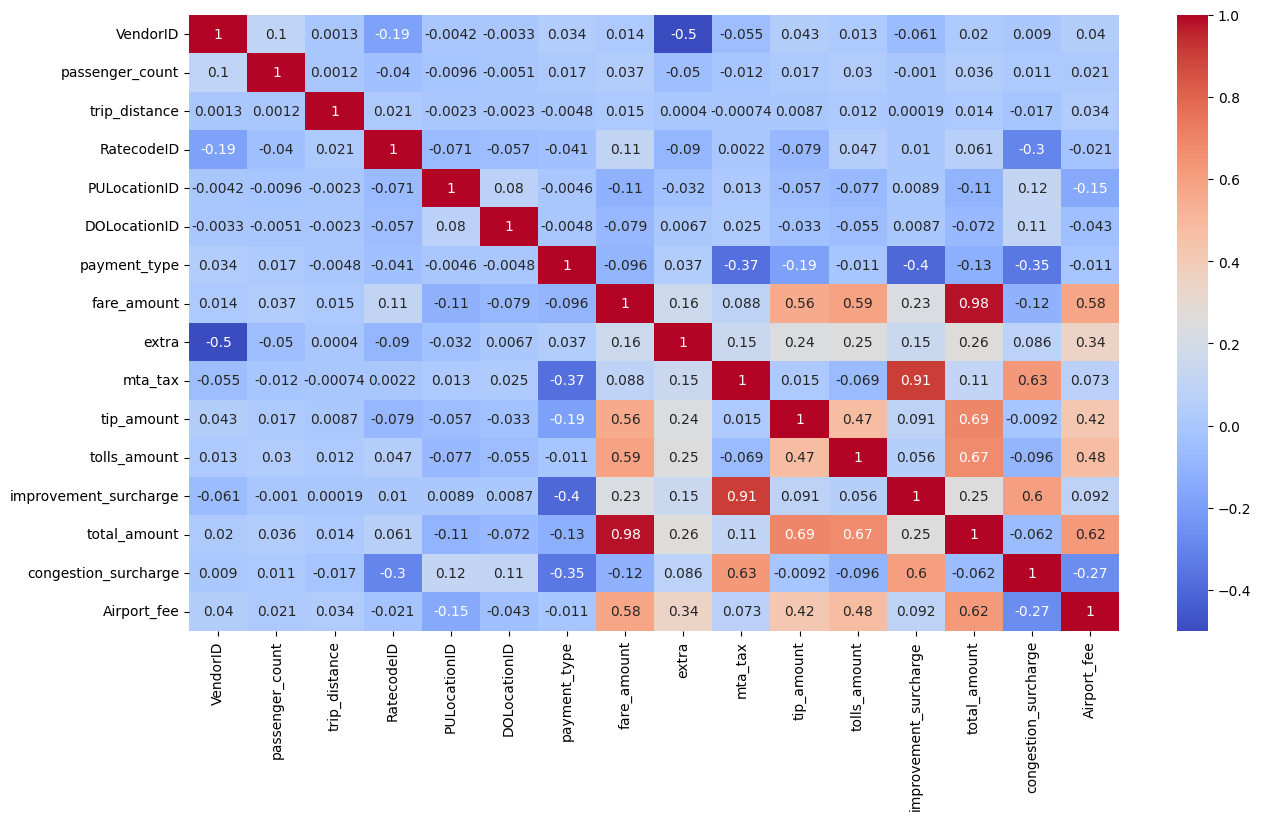

In [ ]:
# Analizamos y graficamos la Matriz de Correlación en un Heatmap

matriz_correlacion = trips.corr(numeric_only = True)

plt.figure(figsize = (15,8))
sns.heatmap(matriz_correlacion, annot = True, cmap='coolwarm')
plt.show()

Viendo este gráfico podemos destacar las siguientes observaciones:
- La variable *total_amount* tiene una correlación muy fuerte con *fare_amount*.
  - Esto tiene bastante sentido ya que, el importe de tarifa por tiempo y distancia tiene un impacto directo en el monto total a pagar por el viaje.
- La variable *total_amount* tiene una correlación considerable con la variable *tip_amount*.
  - Esto puede tener sentido ya que la propina con tarjeta de crédito esta siendo sumada al monto total.
- La variable *total_amount* tiene una correlación considerable con la variable *tolls_amount*.
  - Esto puede tener sentido ya que el monto de los peajes pagados impactan al monto total.
- La variable *total_amount* tiene una correlación considerable con la variable *Airport_fee*.
  - Esto puede tener sentido ya que es un agregado que se aplica sobre el monto total.
- La variable *fare_amount* tiene una correlación considerable con *tip_ampunt*.
  - Esto puede decir que a mayor importe de tarifa, mayor es la propina pagada por el pasajero.
- La variable *fare_amount* tiene una correlación considerable con *tolls_amount*.
  - Esto puede indicar que los viajes más caros suelen incluir peajes.
- La variable *mta_tax* tiene una correlación muy fuerte con *improvement_surcharge*.
  - Esto tiene sentido, ya que ambos son recargos fijos aplicados casi siempre de manera conjunta, por lo que su presencia está fuertemente ligada.
- La variable *fare_amount* tiene una correlación considerable con la variable *Airport_fee*.
  - Esto puede indica que los viajes que parten desde aeropuertos suelen tener importes de tarifas más altas.


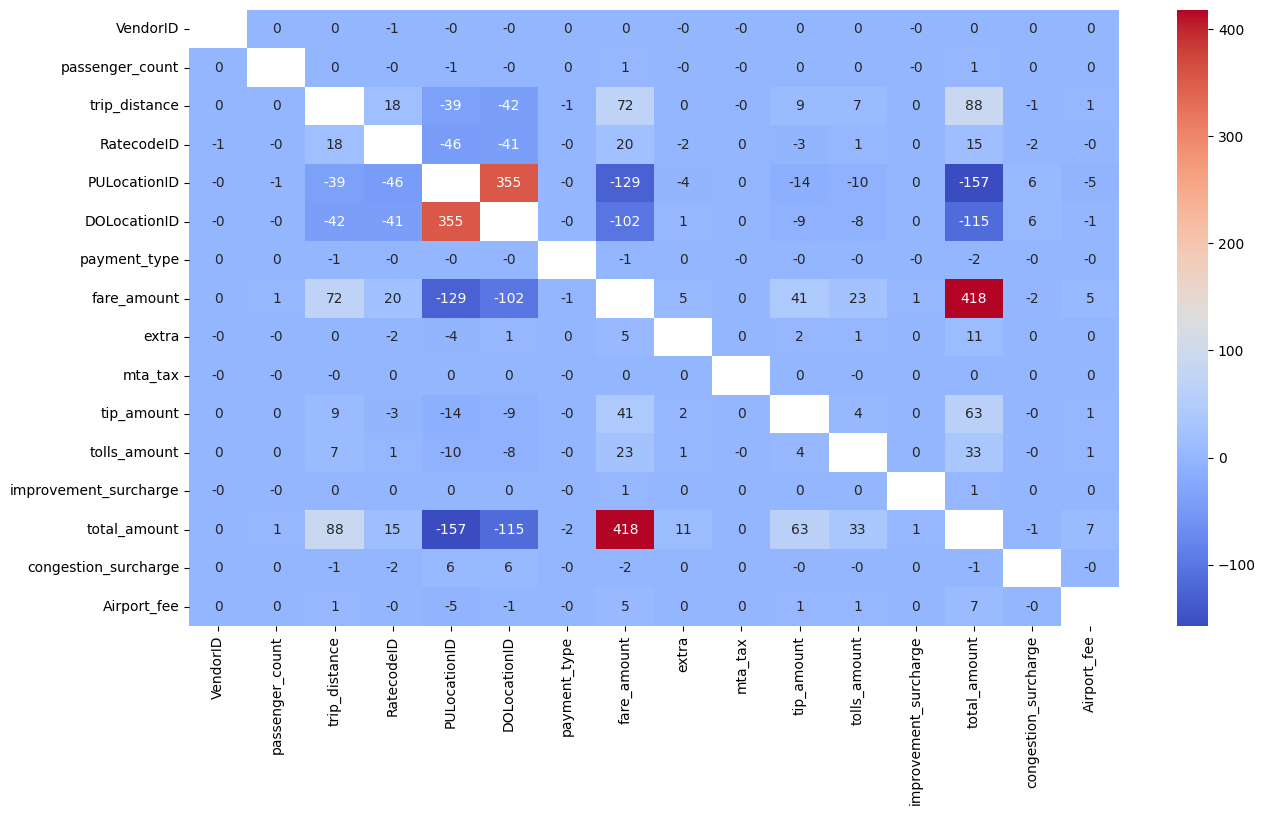

In [ ]:
#Graficamos la Matriz de Covarianza en un Heatmap
matriz_covarianza = trips.cov(numeric_only = True).round(0)

# No mostramos la diagonal para que sea más legible el gráfico por los altos valores numericos que tiene en comparación con el resto.
diagonal = np.eye(len(matriz_covarianza), dtype = bool)

plt.figure(figsize = (15,8))
sns.heatmap(matriz_covarianza, mask = diagonal, annot = True, fmt = ".0f", cmap='coolwarm')
plt.show()

Lo mas destacable que se puede mencionar, es como la variable *total_amount* y *fare_amount* presentan un valor de *418*, eso nos quiere decir que se encuentran relacioandas y que ambas tienen una tendencia a crecimiento positivo en conjunto.

**Nota**: La matriz de correlación ***no*** se encuentra normalizada.

## Tratamiento de datos faltantes

In [ ]:
# Visualizamos el porcentaje de datos faltantes por cada columna de dataframe

filas_totales = trips.shape[0]
print(trips.isna().sum() * 100 / filas_totales)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          7.87001
trip_distance            0.00000
RatecodeID               7.87001
store_and_fwd_flag       7.87001
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     7.87001
Airport_fee              7.87001
dtype: float64


Podemos ver que existen columnas con datos faltantes, estas son:
- *passenger_count*
- *RatecodeID*
- *store_and_fwd_flag*
- *congestion_surcharge*
- *Airport_fee*

***Observación:*** Todas estas columnas tienen el mismo porcentaje de datos faltantes.

A continuación se realizará por cada columna un tratamiento sobre los datos faltantes.  

### Tratamiento de datos faltantes sobre *passenger_count*

In [ ]:
# Veamos cuántos viajes hay por cada cantidad de pasajeros:

trips['passenger_count'].value_counts()

,count
passenger_count,
1.0,6819814
2.0,1262673
3.0,285983
4.0,164590
0.0,105931
5.0,98046
6.0,65680
8.0,77
7.0,14


In [ ]:
# Veamos el porcentaje que representa cada cantidad de pasajeros sobre el dataset:

trips['passenger_count'].value_counts(normalize = True) * 100

,proportion
passenger_count,
1.0,77.473095
2.0,14.343967
3.0,3.248767
4.0,1.869743
0.0,1.203376
5.0,1.113803
6.0,0.746125
8.0,0.000875
7.0,0.000159


Podemos observar que la cantidad de pasajeros más común en los viajes es *1* por una amplia diferencia.

Viendo que la variable *passenger_count* es una variable *cuantitativa discreta*, la forma de imputar los datos que nos resulta más convincente es ***sustitución por mediana***.

In [ ]:
# Buscamos la mediana de la variable passenger_count:

passenger_count_mediana = trips['passenger_count'].median()
print("La mediana de la variable passenger_count es: " + str(passenger_count_mediana))

La mediana de la variable passenger_count es: 1.0


In [ ]:
# Imputamos los datos faltantes de la variable passenger_count:

trips_sin_faltantes = trips.copy()
trips_sin_faltantes['passenger_count'] = trips_sin_faltantes['passenger_count'].fillna(passenger_count_mediana)

In [ ]:
# Verificamos que no haya valores faltantes en la columna:

cant_faltantes = trips_sin_faltantes['passenger_count'].isna().sum()
print("La cantidad de valores faltantes en la columna es de: " + str(cant_faltantes))

La cantidad de valores faltantes en la columna es de: 0


In [ ]:
# Vemos la nueva proporción que tienen los datos:

trips_sin_faltantes['passenger_count'].value_counts(normalize = True) * 100

,proportion
passenger_count,
1.0,79.245965
2.0,13.215095
3.0,2.993089
4.0,1.722594
0.0,1.108670
5.0,1.026146
6.0,0.687405
8.0,0.000806
7.0,0.000147


### Tratamiento de datos faltantes sobre *RatecodeID*

In [ ]:
# Veamos la cantidad de veces que se eligió cada tarifa final:

trips['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,8294136
2.0,307735
99.0,96699
5.0,59544
3.0,25391
4.0,19294
6.0,17


In [ ]:
# Veamos el porcentaje que representa cada tarifa final sobre el dataset:

trips['RatecodeID'].value_counts(normalize = True) * 100

,proportion
RatecodeID,
1.0,94.221395
2.0,3.495870
99.0,1.098501
5.0,0.676420
3.0,0.288442
4.0,0.219180
6.0,0.000193


Podemos observar que el tipo de factura final más elegido es *1* por una muy amplia diferencia.

Viendo que la variable *RatecodeID* es una variable *categórica nominal*, la forma de imputar los datos que nos resulta más convincente es ***imputación por categoría más frecuente***.

#### Antes de proceder con la imputación por categoría más frecuente, vamos a imputar algunas filas con el siguiente criterio:
- Si la fila tiene `RatecodeID = N/A` y el taxi tiene como origen/destino el aeropuerto JFK, con un ID de $132$, entonces se le asignara en su RatecodeID el valor de $2$.
- Si la fila tiene `RatecodeID = N/A` y el taxi tiene como origen/destino Newark, con un ID de $1$, entonces se le asignara en su RatecodeID el valor de $3$.
- Si la fila tiene `RatecodeID = N/A` y el taxi tiene como origen/destino Westchester, con un ID de $250$, entonces se le asignara en su RatecodeID el valor de $4$ (no se tendra en cuenta Nassau, ya que no contamos con información del mismo).

In [ ]:
# RatecodeID: 2 = JFK
trips_sin_faltantes[(trips_sin_faltantes['RatecodeID'].isna()) & ((trips_sin_faltantes['PULocationID'] == 132) | (trips_sin_faltantes['DOLocationID'] == 132))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2825117,2,2024-01-01 00:37:31,2024-01-01 01:12:32,1.0,18.16,NaN,None,132,113,0,60.61,0.00,0.5,0.00,6.94,1.0,71.55,NaN,NaN
2825701,2,2024-01-01 01:24:32,2024-01-01 02:07:03,1.0,19.44,NaN,None,181,132,0,50.74,0.00,0.5,10.45,0.00,1.0,62.69,NaN,NaN
2825996,1,2024-01-01 01:07:26,2024-01-01 01:34:58,1.0,17.40,NaN,None,132,229,0,70.00,1.75,0.5,12.40,6.94,1.0,95.09,NaN,NaN
2826931,1,2024-01-01 01:33:49,2024-01-01 02:09:26,1.0,20.00,NaN,None,132,238,0,70.00,1.75,0.5,8.00,6.94,1.0,90.69,NaN,NaN
2828073,1,2024-01-01 03:42:24,2024-01-01 04:23:42,1.0,0.00,NaN,None,246,132,0,59.86,0.00,0.5,0.00,6.94,1.0,70.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554584,2,2024-03-31 22:55:18,2024-03-31 23:23:15,1.0,7.40,NaN,None,132,225,0,39.28,0.00,0.5,0.00,0.00,1.0,40.78,NaN,NaN
9554588,1,2024-03-31 22:59:13,2024-03-31 23:11:18,1.0,5.20,NaN,None,132,197,0,21.90,2.75,0.5,0.00,0.00,1.0,26.15,NaN,NaN
9554682,1,2024-03-31 23:23:14,2024-03-31 23:32:17,1.0,4.00,NaN,None,132,203,0,16.64,0.00,0.5,0.00,0.00,1.0,18.14,NaN,NaN
9554705,2,2024-03-31 23:06:07,2024-03-31 23:16:58,1.0,4.96,NaN,None,132,197,0,17.25,0.00,0.5,0.00,0.00,1.0,18.75,NaN,NaN


In [ ]:
# Aquellas filas que cumplen con la condición, se les va a imputar en RatecodeID, el valor 2.
trips_sin_faltantes.loc[(trips_sin_faltantes['RatecodeID'].isna()) & ((trips_sin_faltantes['PULocationID'] == 132) | (trips_sin_faltantes['DOLocationID'] == 132)),'RatecodeID'] = 2


In [ ]:
# RatecodeID: 3 = Newark
trips_sin_faltantes[(trips_sin_faltantes['RatecodeID'].isna()) & ((trips_sin_faltantes['PULocationID'] == 1) | (trips_sin_faltantes['DOLocationID'] == 1))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2829337,2,2024-01-01 04:14:50,2024-01-01 04:51:06,1.0,17.86,NaN,None,262,1,0,72.44,0.0,0.0,2.00,12.75,1.0,88.19,NaN,NaN
2830266,2,2024-01-01 05:35:22,2024-01-01 06:00:30,1.0,12.16,NaN,None,209,1,0,71.72,0.0,0.0,17.09,12.75,1.0,102.56,NaN,NaN
2830903,2,2024-01-01 06:33:00,2024-01-01 07:05:00,1.0,18.22,NaN,None,143,1,0,72.37,0.0,0.0,17.62,14.75,1.0,105.74,NaN,NaN
2831116,2,2024-01-01 07:25:14,2024-01-01 07:51:22,1.0,18.24,NaN,None,143,1,0,74.13,0.0,0.0,17.98,14.75,1.0,107.86,NaN,NaN
2831641,1,2024-01-01 10:43:26,2024-01-01 11:16:40,1.0,14.70,NaN,None,164,1,0,70.00,0.0,0.0,0.00,12.75,1.0,83.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545074,2,2024-03-31 05:54:00,2024-03-31 06:22:00,1.0,19.87,NaN,None,151,1,0,80.19,0.0,0.0,18.81,16.38,1.0,116.38,NaN,NaN
9545367,1,2024-03-31 06:56:49,2024-03-31 07:27:18,1.0,15.10,NaN,None,143,1,0,70.00,0.0,0.0,0.00,13.38,1.0,84.38,NaN,NaN
9546335,1,2024-03-31 10:09:27,2024-03-31 10:31:18,1.0,0.00,NaN,None,68,1,0,71.00,0.0,0.5,13.25,13.38,1.0,103.63,NaN,NaN
9548148,1,2024-03-31 13:24:53,2024-03-31 13:57:40,1.0,13.30,NaN,None,113,1,0,72.70,0.0,0.0,17.81,15.38,1.0,106.89,NaN,NaN


In [ ]:
# Aquellas filas que cumplen con la condición, se les va a imputar en RatecodeID, el valor 3.
trips_sin_faltantes.loc[(trips_sin_faltantes['RatecodeID'].isna()) & ((trips_sin_faltantes['PULocationID'] == 1) | (trips_sin_faltantes['DOLocationID'] == 1)),'RatecodeID'] = 3

In [ ]:
# RatecodeID: 4 = Nassau o Westchester
trips_sin_faltantes[(trips_sin_faltantes['RatecodeID'].isna()) & ((trips_sin_faltantes['PULocationID'] == 250) | (trips_sin_faltantes['DOLocationID'] == 250))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2825252,1,2024-01-01 00:52:44,2024-01-01 01:08:07,1.0,0.00,NaN,None,250,169,0,29.66,0.0,0.5,0.0,0.00,1.0,31.16,NaN,NaN
2829057,2,2024-01-01 04:34:39,2024-01-01 04:47:05,1.0,4.93,NaN,None,250,18,0,22.45,0.0,0.5,0.0,0.00,1.0,23.95,NaN,NaN
2829314,2,2024-01-01 04:13:44,2024-01-01 04:21:51,1.0,2.25,NaN,None,248,250,0,10.39,0.0,0.5,0.0,0.00,1.0,11.89,NaN,NaN
2829315,2,2024-01-01 04:36:18,2024-01-01 04:53:17,1.0,7.45,NaN,None,250,116,0,27.35,0.0,0.5,0.0,0.00,1.0,28.85,NaN,NaN
2830245,1,2024-01-01 05:45:28,2024-01-01 05:57:55,1.0,0.00,NaN,None,250,69,0,20.52,0.0,0.5,0.0,0.00,1.0,22.02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552820,2,2024-03-31 20:40:00,2024-03-31 21:06:00,1.0,5.48,NaN,None,250,244,0,27.89,0.0,0.5,0.0,0.00,1.0,29.39,NaN,NaN
9552867,2,2024-03-31 20:49:00,2024-03-31 21:20:27,1.0,13.67,NaN,None,250,216,0,45.31,0.0,0.5,0.0,6.94,1.0,53.75,NaN,NaN
9552868,2,2024-03-31 20:18:17,2024-03-31 20:32:18,1.0,3.75,NaN,None,126,250,0,17.09,0.0,0.5,0.0,0.00,1.0,18.59,NaN,NaN
9553115,2,2024-03-31 20:52:00,2024-03-31 21:44:00,1.0,17.26,NaN,None,17,250,0,55.33,0.0,0.5,0.0,0.00,1.0,59.33,NaN,NaN


In [ ]:
# Aquellas filas que cumplen con la condición, se les va a imputar en RatecodeID, el valor 4.
trips_sin_faltantes.loc[(trips_sin_faltantes['RatecodeID'].isna()) & ((trips_sin_faltantes['PULocationID'] == 250) | (trips_sin_faltantes['DOLocationID'] == 250)),'RatecodeID'] = 4

#### Ahora, procedemos con la imputación por categoría más frecuente.

In [ ]:
# Imputamos los datos faltantes de la variable RatecodeID:

RatecodeID_valor_mas_freceunte = 1.0
trips_sin_faltantes['RatecodeID'] = trips_sin_faltantes['RatecodeID'].fillna(RatecodeID_valor_mas_freceunte)

In [ ]:
# Verificamos que no haya valores faltantes en la columna:

cant_faltantes = trips_sin_faltantes['RatecodeID'].isna().sum()
print("La cantidad de valores faltantes en la columna es de: " + str(cant_faltantes))

La cantidad de valores faltantes en la columna es de: 0


In [ ]:
# Vemos la nueva proporción que tienen los datos:

trips_sin_faltantes['RatecodeID'].value_counts(normalize=True)*100

,proportion
RatecodeID,
1.0,94.578545
2.0,3.300799
99.0,1.012049
5.0,0.623186
3.0,0.280791
4.0,0.204453
6.0,0.000178


### Tratamiento de datos faltantes sobre *store_and_fwd_flag*

In [ ]:
# Veamos la cantidad de veces que el registro del viaje fue almacenado en la memoria del vehículo antes de enviarlo al proveedor
# porque el vehículo no tenía conexión con el servidor:

trips['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,8765947
Y,36869


In [ ]:
# Veamos el porcentaje que estas cantidades representan sobre el dataset:

trips['store_and_fwd_flag'].value_counts(normalize = True) * 100

,proportion
store_and_fwd_flag,
N,99.581168
Y,0.418832


Podemos observar que la mayoría de los viajes se concentran por alta diferencia en la categoría *N*.

Viendo que la variable *store_and_fwd_flag* es una variable *categórica nominal*, la forma de imputar los datos que nos resulta más convincente es ***imputación por categoría más frecuente***.

In [ ]:
# Imputamos los datos faltantes de la variable store_and_fwd_flag:

store_and_fwd_flag_valor_mas_freceunte = 'N'
trips_sin_faltantes['store_and_fwd_flag'] = trips_sin_faltantes['store_and_fwd_flag'].fillna(store_and_fwd_flag_valor_mas_freceunte)

In [ ]:
# Verificamos que no haya valores faltantes en la columna:

cant_faltantes = trips_sin_faltantes['store_and_fwd_flag'].isna().sum()
print("La cantidad de valores faltantes en la columna es de: " + str(cant_faltantes))

La cantidad de valores faltantes en la columna es de: 0


In [ ]:
# Vemos la nueva proporción que tienen los datos:
trips_sin_faltantes['store_and_fwd_flag'].value_counts(normalize = True)*100


,proportion
store_and_fwd_flag,
N,99.61413
Y,0.38587


### Tratamiento de datos faltantes sobre *congestion_surcharge*

In [ ]:
# Veamos la cantidad de viajes que hay por cada recargo:

trips['congestion_surcharge'].value_counts()

,count
congestion_surcharge,
2.50,8046158
0.00,661535
-2.50,95111
0.75,5
1.00,5
-0.75,2


In [ ]:
# Veamos el porcentaje que representa cada recargo sobre el dataset:

trips['congestion_surcharge'].value_counts(normalize = True) * 100

,proportion
congestion_surcharge,
2.50,91.404364
0.00,7.515038
-2.50,1.080461
0.75,0.000057
1.00,0.000057
-0.75,0.000023


Podemos observar que el recargo más común es $2.5$ por alta diferencia.

Viendo que la variable *congestion_surcharge* es una variable *cuantitativa discreta*, la forma de imputar los datos que nos resulta más convincente es ***sustitución por mediana***.

In [ ]:
# Buscamos la mediana de la variable congestion_surcharge:

congestion_surcharge_mediana = trips['congestion_surcharge'].median()
print("La mediana de la variable congestion_surcharge es: " + str(congestion_surcharge_mediana))

La mediana de la variable congestion_surcharge es: 2.5


In [ ]:
# Imputamos los datos faltantes de la variable congestion_surcharge:

trips_sin_faltantes['congestion_surcharge'] = trips_sin_faltantes['congestion_surcharge'].fillna(congestion_surcharge_mediana)

In [ ]:
# Verificamos que no haya valores faltantes en la columna:

cant_faltantes = trips_sin_faltantes['congestion_surcharge'].isna().sum()
print("La cantidad de valores faltantes en la columna es de: " + str(cant_faltantes))

La cantidad de valores faltantes en la columna es de: 0


In [ ]:
# Vemos la nueva proporción que tienen los datos:
trips_sin_faltantes['congestion_surcharge'].value_counts(normalize = True) * 100

,proportion
congestion_surcharge,
2.50,92.080842
0.00,6.923604
-2.50,0.995429
0.75,0.000052
1.00,0.000052
-0.75,0.000021


### Tratamiento de datos faltantes sobre *Airport_fee*

In [ ]:
# Vemos la cantidad de veces que el recargo fue usado:

trips['Airport_fee'].value_counts()

,count
Airport_fee,
0.00,8077133
1.75,709414
-1.75,16269


In [ ]:
# Veamos el porcentaje que representan respecto del dataset:

trips['Airport_fee'].value_counts(normalize = True) * 100

,proportion
Airport_fee,
0.00,91.756240
1.75,8.058944
-1.75,0.184816


Podemos observar que lo más común es no utilizar el recargo.

Viendo que la variable *Airport_fee* es una variable *cuantitativa discreta*, la forma de imputar los datos que nos resulta más convincente es ***sustitución por mediana***.

In [ ]:
# Buscamos la mediana de la variable Airport_fee:

Airport_fee_mediana = trips['Airport_fee'].median()
print("La mediana de la variable Airport_fee es: " + str(Airport_fee_mediana))

La mediana de la variable Airport_fee es: 0.0


In [ ]:
# Imputamos los datos faltantes de la variable Airport_fee:

trips_sin_faltantes['Airport_fee'] = trips_sin_faltantes['Airport_fee'].fillna(Airport_fee_mediana)

In [ ]:
# Verificamos que no haya valores faltantes en la columna:

cant_faltantes = trips_sin_faltantes['Airport_fee'].isna().sum()
print("La cantidad de valores faltantes en la columna es de: " + str(cant_faltantes))

La cantidad de valores faltantes en la columna es de: 0


In [ ]:
# Vemos la nueva proporción que tienen los datos:

trips_sin_faltantes['Airport_fee'].value_counts(normalize = True) * 100

,proportion
Airport_fee,
0.00,92.405025
1.75,7.424704
-1.75,0.170271


## Conclusión de la imputación de los datos

In [ ]:
# Visualizamos la cantidad de datos nulos por columna en el dataframe

print(trips_sin_faltantes.isna().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


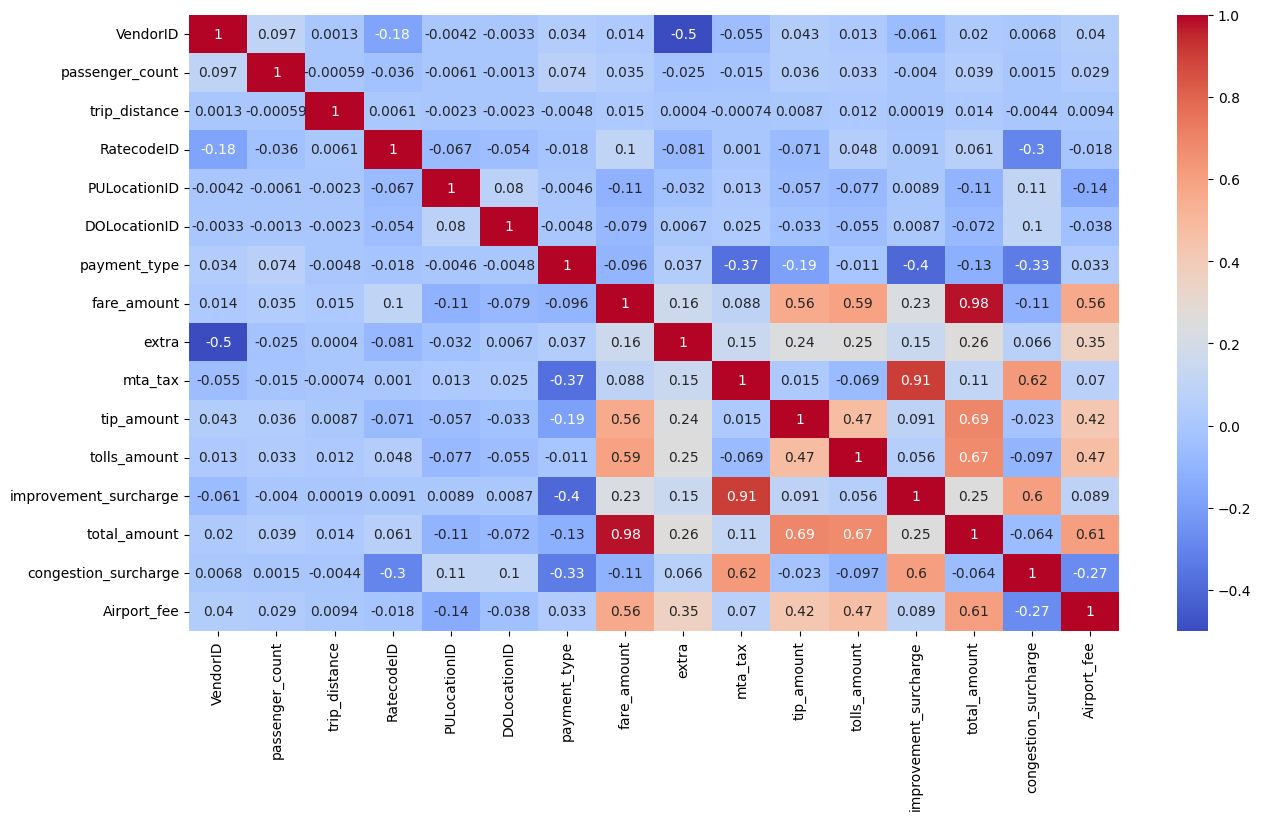

In [ ]:
# Visualizamos la matriz de correlación nuevamente, pero con los valores ya imputados
matriz_correlacion1 = trips_sin_faltantes.corr(numeric_only = True)
matriz_correlacion1
plt.figure(figsize = (15,8))
sns.heatmap(matriz_correlacion1, annot = True, cmap='coolwarm')
plt.show()

**Nota**: A pesar de la imputación de los datos, no hubo cambios significativos en las correlaciones entre las variables.

## Identificación y análisis de valores atípicos

Primero analizaremos los Box Plot de las variables más importantes según nuestro criterio:

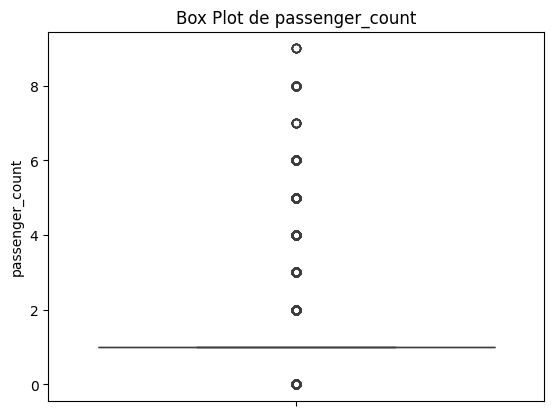

In [ ]:
# Graficamos el Box Plot de la variable passenger_count

sns.boxplot(
    data = trips_sin_faltantes,
    y = 'passenger_count'
).set(ylabel = "passenger_count", title = "Box Plot de passenger_count")
plt.show()

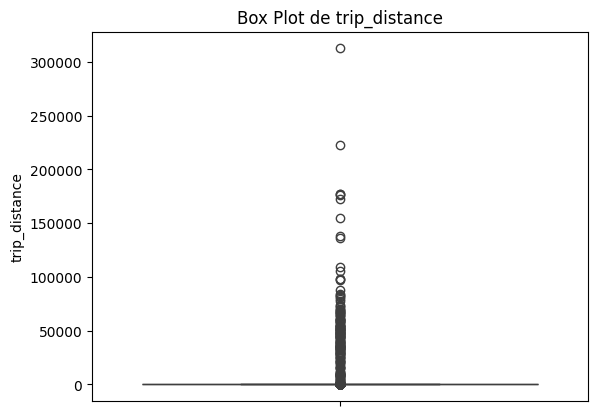

In [ ]:
# Graficamos el Box Plot de la variable trip_distance

sns.boxplot(
    data = trips_sin_faltantes,
    y = 'trip_distance'
).set(ylabel = "trip_distance", title = "Box Plot de trip_distance")
plt.show()

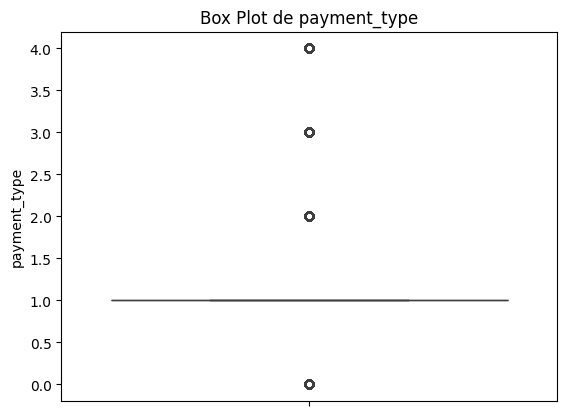

In [ ]:
# Graficamos el Box Plot de la variable payment_type

sns.boxplot(
    data = trips_sin_faltantes,
    y = 'payment_type'
).set(ylabel = "payment_type", title = "Box Plot de payment_type")
plt.show()

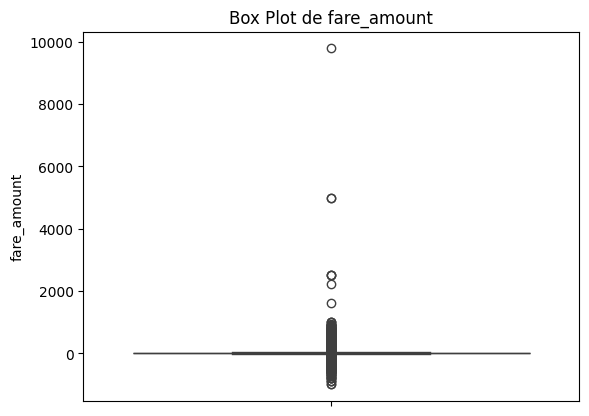

In [ ]:
# Graficamos el Box Plot de la variable fare_amount

sns.boxplot(
    data = trips_sin_faltantes,
    y = 'fare_amount'
).set(ylabel = "fare_amount", title = "Box Plot de fare_amount")
plt.show()

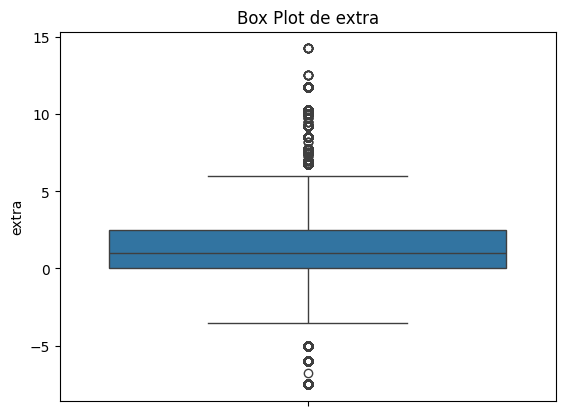

In [ ]:
# Graficamos el Box Plot de la variable extra

sns.boxplot(
  data = trips_sin_faltantes,
  y = 'extra'
).set(ylabel = "extra", title = "Box Plot de extra")
plt.show()

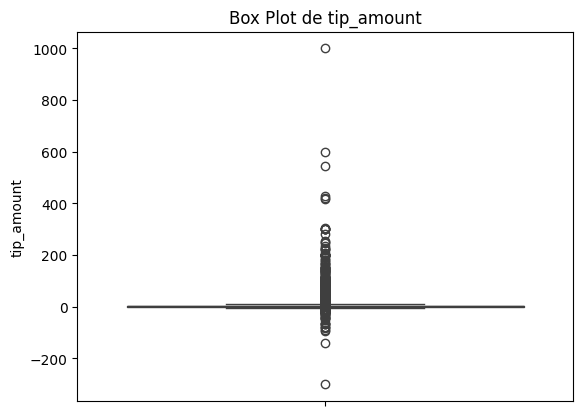

In [ ]:
# Graficamos el Box Plot de la variable tip_amount

sns.boxplot(
  data = trips_sin_faltantes,
  y = 'tip_amount'
).set(ylabel = "tip_amount", title = "Box Plot de tip_amount")
plt.show()

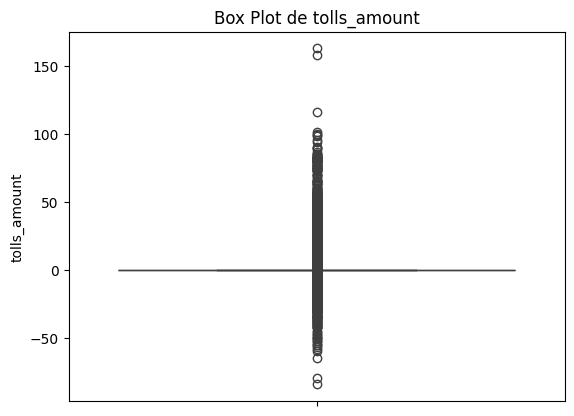

In [ ]:
# Graficamos el Box Plot de la variable tolls_amount

sns.boxplot(
    data = trips_sin_faltantes,
    y = 'tolls_amount'
).set(ylabel = "tolls_amount", title = "Box Plot de tolls_amount")
plt.show()

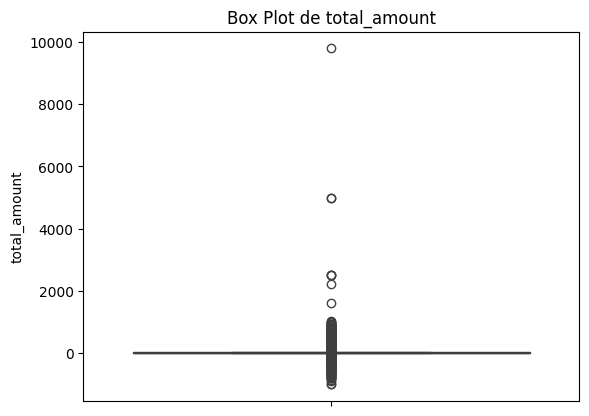

In [ ]:
# Graficamos el Box Plot de la variable total_amount

sns.boxplot(
    data = trips_sin_faltantes,
    y = 'total_amount'
).set(ylabel = "total_amount", title = "Box Plot de total_amount")
plt.show()


Obsevaciones
1.   En el BoxPlot de la variable `passenger_count` nos encontramos con viajes que tienen una cantidad de pasajeros de 0, caso que no puede suceder, porque no tiene sentido, además se tomara como máxima cantidad $4$ pasajeros.
2.   En el BoxPlot de la variable `trip_distance` podemos observar que tenemos viajes con distancia igual a $0$, caso que caso que no puede suceder, porque no tiene sentido, además se tomara como máxima distancia $62$ millas, que son aproximadamente $100$ kilometros.
3. En el BoxPlot de la variable `payment_type`, tenemos un tipo de pago que no figura en el diccionario de datos del dataset, este valor vendria siendo el $0$.
4. En el BoxPlot de la variable `fare_amount` nos encontramos con valores que son menores o igual a $0$, cosa que no puede suceder, porque no tiene sentido, además se tomara como máximo valor de tarifa por tiempo y distancia $300$ dolares.
5. En el BoxPlot de la variable `extra`, nos concontramos con valores menores igual a $0$, cosa que no puede suceder, porque no tiene sentido.
6. En el BoxPlot de la variable `tip_amount`, tenemos valores que son menores a $0$, cosa que no puede suceder, porque no tiene sentido, además se tomara como máximo valor de propina $100$ dolares.
7. En el BoxPlot de la variable `tolls_amount`, tenemos valores que son menores a $0$, cosa que no puede suceder, porque no tiene sentido, además se tomara como máximo valor de pago total de peajes $60$ dolares.
8. En el BoxPlot de la variable `total_amount`, tenemos valores que son menores igual a $0$, cosa que no puede suceder, porque no tiene sentido, además se tomara como máximo valor por el costo del viaje $400$ dolares.

Con las observaciones realizadas, se procedera a eliminar los valores atipicos, de las columnas `passenger_count`, `trip_distance`, `fare_amount`, `extra`, `tip_amount`, `tolls_amount` y `total_amount`.

Con la columna `payment_type`, al tener una gran cantidad de valores que valen 0, eliminarlos representaria una perdida significativa de datos. Por lo que se decidio que todo aquel `payment_type` con valor $0$, representara un tipo de pago **DESCONOCIDO**.

In [ ]:
# Filtramos los valores atipicos de las columnas mencionadas, cota inferior

trips_filtrados = trips_sin_faltantes[trips_sin_faltantes['passenger_count'] > 0]
trips_filtrados = trips_filtrados[trips_filtrados['trip_distance'] > 0]
trips_filtrados = trips_filtrados[trips_filtrados['fare_amount'] > 0]
trips_filtrados = trips_filtrados[trips_filtrados['extra'] >= 0]
trips_filtrados = trips_filtrados[trips_filtrados['tip_amount'] >= 0]
trips_filtrados = trips_filtrados[trips_filtrados['tolls_amount'] >= 0]
trips_filtrados = trips_filtrados[trips_filtrados['total_amount'] > 0]


In [ ]:
# Filtramos los valores atipicos de las columnas mencionadas, cota superior

trips_filtrados = trips_filtrados[trips_filtrados['passenger_count'] <= 4]
trips_filtrados = trips_filtrados[trips_filtrados['trip_distance'] <= 62]
trips_filtrados = trips_filtrados[trips_filtrados['fare_amount'] <= 300]
trips_filtrados = trips_filtrados[trips_filtrados['tip_amount'] <= 100]
trips_filtrados = trips_filtrados[trips_filtrados['tolls_amount'] <= 60]
trips_filtrados = trips_filtrados[trips_filtrados['total_amount'] <= 400]

In [ ]:
cant_de_eliminados = trips_sin_faltantes.shape[0] - trips_filtrados.shape[0]
porcentaje_de_eliminados = (cant_de_eliminados/trips.shape[0])*100

print("Cantidad de observaciones eliminadas: "+ str(cant_de_eliminados))
print(f"Porcentaje de observaciones eliminadas respecto al total: {porcentaje_de_eliminados:.2f}%")

Cantidad de observaciones eliminadas: 609606
Porcentaje de observaciones eliminadas respecto al total: 6.38%


In [ ]:
# Nos fijamos si tenemos filas duplicadas en el dataframe, en caso de haberlas las eliminamos

print("Cantidad de filas duplicadas:", trips_filtrados.duplicated().sum())

Cantidad de filas duplicadas: 1


In [ ]:
# Eliminamos filas duplicadas y verificamos

trips_filtrados.drop_duplicates(keep='first', inplace = True)
print("Cantidad de filas duplicadas:", trips_filtrados.duplicated().sum())

Cantidad de filas duplicadas: 0


#### A continuación se revizará si es que hay fechas de viajes no iniciadas durante el periodo del *01-01-2024* al *31-03-2024* inclusives.

In [ ]:
inicio = "2024-01-01 00:00:00"
final  = "2024-03-31 23:59:59"
trips_filtrados[(trips_filtrados['tpep_pickup_datetime'] < inicio) | (trips_filtrados['tpep_pickup_datetime'] > final)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
256,2,2023-12-31 23:56:46,2024-01-01 00:12:06,2.0,2.38,1.0,N,236,142,1,15.6,1.00,0.5,1.00,0.00,1.0,21.60,2.5,0.00
369,2,2023-12-31 23:39:17,2023-12-31 23:42:00,2.0,0.47,1.0,N,90,68,1,5.1,1.00,0.5,0.00,0.00,1.0,10.10,2.5,0.00
753,2,2023-12-31 23:41:02,2023-12-31 23:48:03,1.0,0.40,1.0,N,246,246,2,7.2,1.00,0.5,0.00,0.00,1.0,12.20,2.5,0.00
2210,2,2023-12-31 23:57:17,2024-01-01 00:01:50,1.0,0.53,1.0,N,144,211,1,5.8,1.00,0.5,2.16,0.00,1.0,12.96,2.5,0.00
2615,2,2023-12-31 23:56:45,2024-01-01 00:00:28,1.0,0.97,1.0,N,163,237,1,6.5,1.00,0.5,2.00,0.00,1.0,13.50,2.5,0.00
2985,2,2023-12-31 23:49:12,2024-01-01 00:04:32,1.0,3.14,1.0,N,234,237,1,17.0,1.00,0.5,6.60,0.00,1.0,28.60,2.5,0.00
3176,2,2023-12-31 23:47:28,2023-12-31 23:57:07,2.0,1.44,1.0,N,68,137,1,10.7,1.00,0.5,3.14,0.00,1.0,18.84,2.5,0.00
4142,2,2023-12-31 23:58:37,2024-01-01 00:08:37,2.0,0.59,1.0,N,161,170,1,10.0,1.00,0.5,3.75,0.00,1.0,18.75,2.5,0.00
8628,2,2023-12-31 23:54:27,2024-01-01 00:13:12,1.0,7.70,1.0,N,229,244,1,33.1,1.00,0.5,7.62,0.00,1.0,45.72,2.5,0.00
10915,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1.0,N,137,264,2,4.4,3.50,0.5,0.00,0.00,1.0,9.40,0.0,0.00


Como podemos observar, existen viajes que no se iniciaron en el periodo indicado previamente, por lo que no se los tomará en cuenta para el análisis.

In [ ]:
cant_filas_antes = trips_filtrados.shape[0]
trips_filtrados = trips_filtrados[(trips_filtrados['tpep_pickup_datetime'] >= inicio) & (trips_filtrados['tpep_pickup_datetime'] <= final)]
cant_filas_despues = trips_filtrados.shape[0]

In [ ]:
filas_eliminadas = cant_filas_antes - cant_filas_despues
porcentaje_de_eliminados = (filas_eliminadas/trips.shape[0])*100

print("Cantidad de observaciones eliminadas: "+ str(filas_eliminadas))
print(f"Porcentaje de observaciones eliminadas respecto al total: {porcentaje_de_eliminados:.4f}%")

Cantidad de observaciones eliminadas: 19
Porcentaje de observaciones eliminadas respecto al total: 0.0002%


#### A continuación se revisará si existen viajes que aplican el extra por recogida en los aeropuertos de *LaGuardia* y *John F. Kennedy* que inician el viaje desde una ID que no sea la de estos aeropuertos.

ID de los aeropuertos son:
-  ID de LaGuardia Airport: $138$
- ID de JFK Airport: $132$  

In [ ]:
no_aerpuertos = trips_filtrados[(trips_filtrados['Airport_fee'] == 1.75) & (trips_filtrados['PULocationID'] != 132) & (trips_filtrados['PULocationID'] != 138)]
no_aerpuertos.shape

(31608, 19)

In [ ]:
no_aerpuertos['PULocationID'].value_counts()

,count
PULocationID,
70,29787
264,574
129,203
230,118
145,79
...,...
67,1
6,1
40,1


Podemos observar que existen viajes que no iniciaron desde alguno de los aeropuertos mencionados pero tienen el extra por recogida desde estos.

Para no perder tantos datos, se tomó la decisión de conservar aquellos viajes que hayan iniciado desde el origen de los aeropuetos.

- *LaGuardia Airport* está ubicado en *East Elmhurst, Queens*, que tiene como ID: $70$.
- *John F. Kennedy* está ubicado en *Jamaica, Queens*, que tiene como ID: $130$.

A continuación se procederá a cambiar la ID de estos viajes a la del respectivo aeropuerto y se borrarán aquellos que no sean de estas IDs.


In [ ]:
# Se reemplaza el PULocationID de los viajes iniciados en East Helmhurst que tengan el extra por recogida desde un aeropuerto
# a el ID de LaGuardia Airport

trips_filtrados.loc[(trips_filtrados['Airport_fee'] > 0) & (trips_filtrados['PULocationID'] == 70), 'PULocationID'] = 138

# Se reemplaza el PULocationID de los viajes iniciados en Jamaica que tengan el extra por recogida desde el aeropuerto
# a el ID de JFK Airport

trips_filtrados.loc[(trips_filtrados['Airport_fee'] > 0) & (trips_filtrados['PULocationID'] == 130), 'PULocationID'] = 132

In [ ]:
# Fitramos los viajes que tengan el extra por recogida desde un aeropuerto pero no tengan el PULocationID de un aeropuerto

cant_filas_antes = trips_filtrados.shape[0]
trips_filtrados = trips_filtrados[~((trips_filtrados['Airport_fee'] > 0) & (~trips_filtrados['PULocationID'].isin([132, 138])))]
cant_filas_despues = trips_filtrados.shape[0]


In [ ]:
filas_eliminadas = cant_filas_antes - cant_filas_despues
porcentaje_de_eliminados = (filas_eliminadas/trips.shape[0])*100

print("Cantidad de observaciones eliminadas: "+ str(filas_eliminadas))
print(f"Porcentaje de observaciones eliminadas respecto al total: {porcentaje_de_eliminados:.2f}%")

Cantidad de observaciones eliminadas: 1806
Porcentaje de observaciones eliminadas respecto al total: 0.02%


### Analisis de Boxplot
Despues de haber terminado esta primera filtración de datos, veamos como quedaron nuevamente los Boxplots.

In [ ]:
# Estos datos ya se encuentran filtrados, para no tener que hacer todo el procesamiento anterior

trips_filtrados = pd.read_csv("/content/datos_filtrados.csv")

In [ ]:
def calcular_outliers(data, columna):
  q1, q3 = np.percentile(data[columna], [25, 75])
  iqr = q3 - q1

  outliers_moderados_sup = q3 + 1.5 * iqr
  outliers_severos_sup = q3 + 3 * iqr

  outliers_moderados_inf = q1 - 1.5 * iqr
  outliers_severos_inf = q1 - 3 * iqr

  cantidad_outliers_moderados_sup = (data[columna] > outliers_moderados_sup).sum()
  cantidad_outliers_severos_sup = (data[columna] > outliers_severos_sup).sum()

  cantidad_outliers_moderados_inf = (data[columna] < outliers_moderados_inf).sum()
  cantidad_outliers_severos_inf = (data[columna] < outliers_severos_inf).sum()
  return cantidad_outliers_moderados_sup, cantidad_outliers_severos_sup, cantidad_outliers_moderados_inf, cantidad_outliers_severos_inf

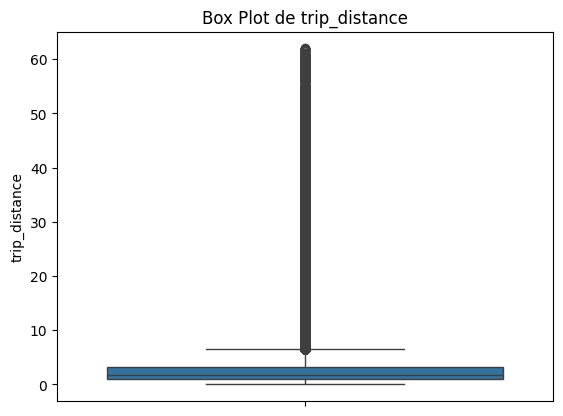

In [ ]:
# Graficamos el Box Plot de la variable trip_distance

sns.boxplot(
    data = trips_filtrados,
    y = 'trip_distance'
).set(ylabel = "trip_distance", title = "Box Plot de trip_distance")
plt.show()

In [ ]:
cantidad_outliers_moderados_sup, cantidad_outliers_severos_sup, cantidad_outliers_moderados_inf, cantidad_outliers_severos_inf = calcular_outliers(trips_filtrados, 'trip_distance')

print("Cantidad de outliers moderados, teniendo en cuanta el bigote superior:", cantidad_outliers_moderados_sup)
print("Cantidad de outliers severos, teniendo en cuenta el bigote superior:", cantidad_outliers_severos_sup)
print()
print("Cantidad de outliers moderados, teniendo en cuanta el bigote inferior:", cantidad_outliers_moderados_inf)
print("Cantidad de outliers severos, teniendo en cuenta el bigote inferior:", cantidad_outliers_severos_inf)

Cantidad de outliers moderados, teniendo en cuanta el bigote superior: 1131559
Cantidad de outliers severos, teniendo en cuenta el bigote superior: 697638

Cantidad de outliers moderados, teniendo en cuanta el bigote inferior: 0
Cantidad de outliers severos, teniendo en cuenta el bigote inferior: 0


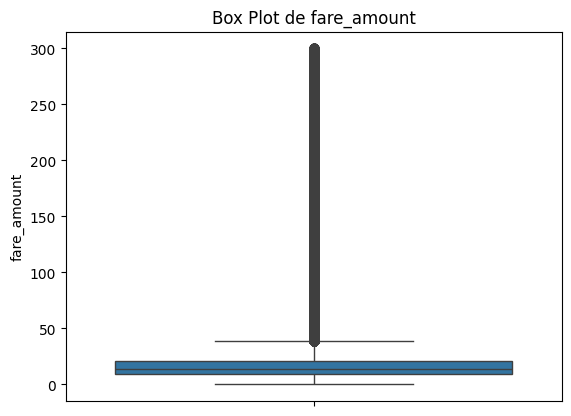

In [ ]:
# Graficamos el Box Plot de la variable fare_amount

sns.boxplot(
    data = trips_filtrados,
    y = 'fare_amount'
).set(ylabel = "fare_amount", title = "Box Plot de fare_amount")
plt.show()

In [ ]:
cantidad_outliers_moderados_sup, cantidad_outliers_severos_sup, cantidad_outliers_moderados_inf, cantidad_outliers_severos_inf = calcular_outliers(trips_filtrados, 'fare_amount')

print("Cantidad de outliers moderados, teniendo en cuanta el bigote superior:", cantidad_outliers_moderados_sup)
print("Cantidad de outliers severos, teniendo en cuenta el bigote superior:", cantidad_outliers_severos_sup)
print()
print("Cantidad de outliers moderados, teniendo en cuanta el bigote inferior:", cantidad_outliers_moderados_inf)
print("Cantidad de outliers severos, teniendo en cuenta el bigote inferior:", cantidad_outliers_severos_inf)

Cantidad de outliers moderados, teniendo en cuanta el bigote superior: 895327
Cantidad de outliers severos, teniendo en cuenta el bigote superior: 476728

Cantidad de outliers moderados, teniendo en cuanta el bigote inferior: 0
Cantidad de outliers severos, teniendo en cuenta el bigote inferior: 0


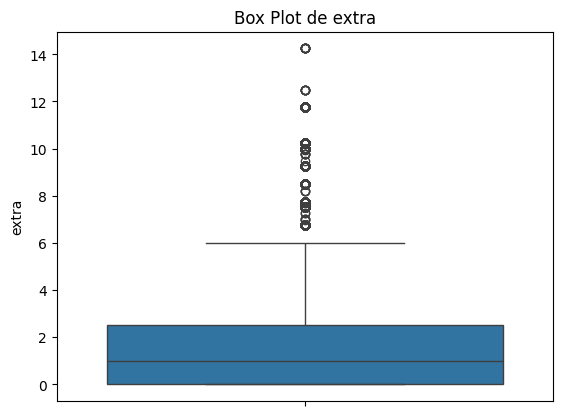

In [ ]:
# Graficamos el Box Plot de la variable extra

sns.boxplot(
  data = trips_filtrados,
  y = 'extra'
).set(ylabel = "extra", title = "Box Plot de extra")
plt.show()

In [ ]:
cantidad_outliers_moderados_sup, cantidad_outliers_severos_sup, cantidad_outliers_moderados_inf, cantidad_outliers_severos_inf = calcular_outliers(trips_filtrados, 'extra')

print("Cantidad de outliers moderados, teniendo en cuanta el bigote superior:", cantidad_outliers_moderados_sup)
print("Cantidad de outliers severos, teniendo en cuenta el bigote superior:", cantidad_outliers_severos_sup)
print()
print("Cantidad de outliers moderados, teniendo en cuanta el bigote inferior:", cantidad_outliers_moderados_inf)
print("Cantidad de outliers severos, teniendo en cuenta el bigote inferior:", cantidad_outliers_severos_inf)

Cantidad de outliers moderados, teniendo en cuanta el bigote superior: 142926
Cantidad de outliers severos, teniendo en cuenta el bigote superior: 16979

Cantidad de outliers moderados, teniendo en cuanta el bigote inferior: 0
Cantidad de outliers severos, teniendo en cuenta el bigote inferior: 0


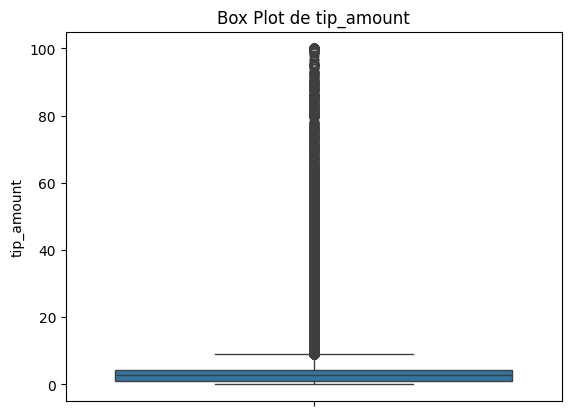

In [ ]:
# Graficamos el Box Plot de la variable tip_amount

sns.boxplot(
  data = trips_filtrados,
  y = 'tip_amount'
).set(ylabel = "tip_amount", title = "Box Plot de tip_amount")
plt.show()

In [ ]:
cantidad_outliers_moderados_sup, cantidad_outliers_severos_sup, cantidad_outliers_moderados_inf, cantidad_outliers_severos_inf = calcular_outliers(trips_filtrados, 'tip_amount')

print("Cantidad de outliers moderados, teniendo en cuanta el bigote superior:", cantidad_outliers_moderados_sup)
print("Cantidad de outliers severos, teniendo en cuenta el bigote superior:", cantidad_outliers_severos_sup)
print()
print("Cantidad de outliers moderados, teniendo en cuanta el bigote inferior:", cantidad_outliers_moderados_inf)
print("Cantidad de outliers severos, teniendo en cuenta el bigote inferior:", cantidad_outliers_severos_inf)

Cantidad de outliers moderados, teniendo en cuanta el bigote superior: 645505
Cantidad de outliers severos, teniendo en cuenta el bigote superior: 295152

Cantidad de outliers moderados, teniendo en cuanta el bigote inferior: 0
Cantidad de outliers severos, teniendo en cuenta el bigote inferior: 0


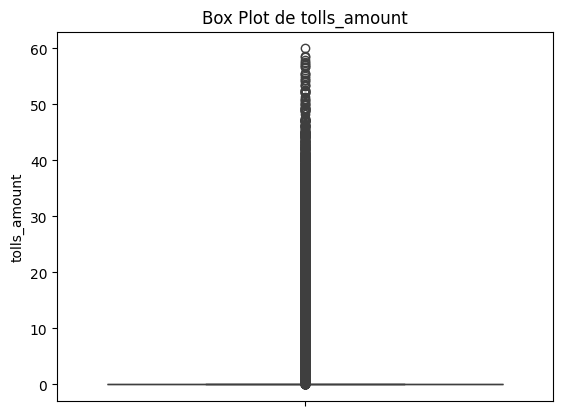

In [ ]:
# Graficamos el Box Plot de la variable tolls_amount

sns.boxplot(
    data = trips_filtrados,
    y = 'tolls_amount'
).set(ylabel = "tolls_amount", title = "Box Plot de tolls_amount")
plt.show()

In [ ]:
cantidad_outliers_moderados_sup, cantidad_outliers_severos_sup, cantidad_outliers_moderados_inf, cantidad_outliers_severos_inf = calcular_outliers(trips_filtrados, 'tolls_amount')

print("Cantidad de outliers moderados, teniendo en cuanta el bigote superior:", cantidad_outliers_moderados_sup)
print("Cantidad de outliers severos, teniendo en cuenta el bigote superior:", cantidad_outliers_severos_sup)
print()
print("Cantidad de outliers moderados, teniendo en cuanta el bigote inferior:", cantidad_outliers_moderados_inf)
print("Cantidad de outliers severos, teniendo en cuenta el bigote inferior:", cantidad_outliers_severos_inf)

Cantidad de outliers moderados, teniendo en cuanta el bigote superior: 647362
Cantidad de outliers severos, teniendo en cuenta el bigote superior: 647362

Cantidad de outliers moderados, teniendo en cuanta el bigote inferior: 0
Cantidad de outliers severos, teniendo en cuenta el bigote inferior: 0


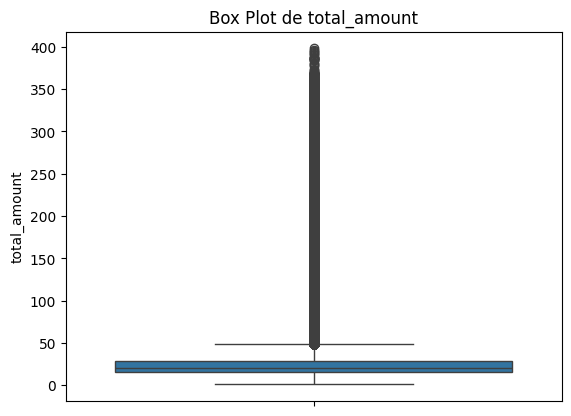

In [ ]:
# Graficamos el Box Plot de la variable total_amount

sns.boxplot(
    data = trips_filtrados,
    y = 'total_amount'
).set(ylabel = "total_amount", title = "Box Plot de total_amount")
plt.show()

In [ ]:
cantidad_outliers_moderados_sup, cantidad_outliers_severos_sup, cantidad_outliers_moderados_inf, cantidad_outliers_severos_inf = calcular_outliers(trips_filtrados, 'total_amount')

print("Cantidad de outliers moderados, teniendo en cuanta el bigote superior:", cantidad_outliers_moderados_sup)
print("Cantidad de outliers severos, teniendo en cuenta el bigote superior:", cantidad_outliers_severos_sup)
print()
print("Cantidad de outliers moderados, teniendo en cuanta el bigote inferior:", cantidad_outliers_moderados_inf)
print("Cantidad de outliers severos, teniendo en cuenta el bigote inferior:", cantidad_outliers_severos_inf)

Cantidad de outliers moderados, teniendo en cuanta el bigote superior: 967053
Cantidad de outliers severos, teniendo en cuenta el bigote superior: 609667

Cantidad de outliers moderados, teniendo en cuanta el bigote inferior: 0
Cantidad de outliers severos, teniendo en cuenta el bigote inferior: 0


Se eliminaron todos los valores irreales, y solo se conservaron aquellos que, aunque poco frecuentes, podrían ocurrir en la realidad.

### Analisis de valores atipicos haciendo uso de la métrica *z-score* - Se profundiza en el reporte.

In [ ]:
def z_calculation(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

In [ ]:
def z_mod_calculation(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / MAD

In [ ]:
trips_filtrados['z_score_trip_distance'] = z_mod_calculation(trips_filtrados.trip_distance)
trips_filtrados['z_score_fare_amount'] = z_mod_calculation(trips_filtrados.fare_amount)
trips_filtrados['z_score_extra'] = z_mod_calculation(trips_filtrados.extra)
trips_filtrados['z_score_tip_amount'] = z_mod_calculation(trips_filtrados.tip_amount)
trips_filtrados['z_score_tolls_amount'] = z_calculation(trips_filtrados.tolls_amount)
trips_filtrados['z_score_total_amount'] = z_mod_calculation(trips_filtrados.total_amount)

***Observación:*** Decidimos hacer *z-score* normal para la columna *tolls_amount* debido a que el calculo con *z-score modificado* da algunos valores nulos.

In [ ]:
# Observamos por cada variable, la cantidad de outliers cantidatos, según la metrica de z-score-mod

variables = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'total_amount']
variables_z_core_mod = ['z_score_trip_distance', 'z_score_fare_amount', 'z_score_extra', 'z_score_tip_amount', 'z_score_total_amount']
outliers_count = {}


for variable, variable_z_core  in zip(variables, variables_z_core_mod):
  outliers = trips_filtrados[np.abs(trips_filtrados[variable_z_core]) > 3.5]
  outliers_count[variable] = outliers.shape[0]

  print("Cantidad de outliers en la variable " + variable + ": " + str(outliers.shape[0]))
  print(outliers[variable].describe().round(2))
  print()

Cantidad de outliers en la variable trip_distance: 1187941
count    1187941.00
mean          12.65
std            5.25
min            6.22
25%            8.51
50%           10.84
75%           17.17
max           62.00
Name: trip_distance, dtype: float64

Cantidad de outliers en la variable fare_amount: 841710
count    841710.00
mean         61.59
std          19.31
min          39.85
25%          46.40
50%          62.50
75%          70.00
max         300.00
Name: fare_amount, dtype: float64

Cantidad de outliers en la variable extra: 142926
count    142926.00
mean          8.31
std           1.29
min           6.75
25%           7.50
50%           7.50
75%           9.25
max          14.25
Name: extra, dtype: float64

Cantidad de outliers en la variable tip_amount: 419719
count    419719.00
mean         16.18
std           4.92
min          11.65
25%          13.30
50%          15.76
75%          17.00
max         100.00
Name: tip_amount, dtype: float64

Cantidad de outliers en la va

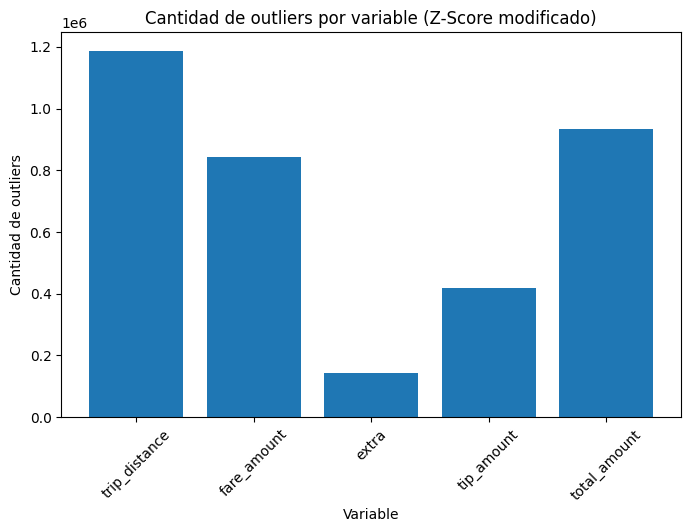

In [ ]:
# Realizamos un grafico de la cantidad de outliers por variable

plt.figure(figsize=(8,5))
plt.bar(outliers_count.keys(), outliers_count.values())
plt.title("Cantidad de outliers por variable (Z-Score modificado)")
plt.xlabel("Variable")
plt.ylabel("Cantidad de outliers")
plt.xticks(rotation=45)
plt.show()


In [ ]:
  #Observamos la cantidad de outliers cantidatos para la variable tolls_amount, según la metrica de z-score

  outliers = trips_filtrados[np.abs(trips_filtrados['z_score_tolls_amount']) > 3]

  print("Cantidad de outliers en la variable tolls_amount: " + str(outliers.shape[0]))
  print(outliers[variable].describe().round(2))
  print()

Cantidad de outliers en la variable tolls_amount: 638497
count    638497.00
mean         82.54
std          24.51
min           7.95
25%          66.64
50%          81.53
75%          97.17
max         395.82
Name: total_amount, dtype: float64



Se utilizó el método de *z-score* para evaluar la presencia de valores atípicos. A pesar de ello, no se borraron datos, dado que fue solo con un fin exploratorio.

### Analisis multivariado
Por un tema de recursos, solo se trabajara con un total de $10.000$ datos previamente tratados.

In [ ]:
# Estos datos ya se encuentran filtrados, para no tener que hacer todo el procesamiento anterior

trips_filtrados = pd.read_csv("/content/datos_filtrados.csv")

In [ ]:
muestra = trips_filtrados.sample(10000, random_state= 10)

#### Analisis de *total_amount* vs *trip_distance*.

In [ ]:
vmedias = np.mean(muestra[["trip_distance", "total_amount"]])

x_dif = muestra[["trip_distance", "total_amount"]] - vmedias

cov = muestra[["trip_distance", "total_amount"]].cov().values
inv_cov = np.linalg.inv(cov)

mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

muestra["mahalanobis_total_amount_trip_distance"] = mahal.diagonal()

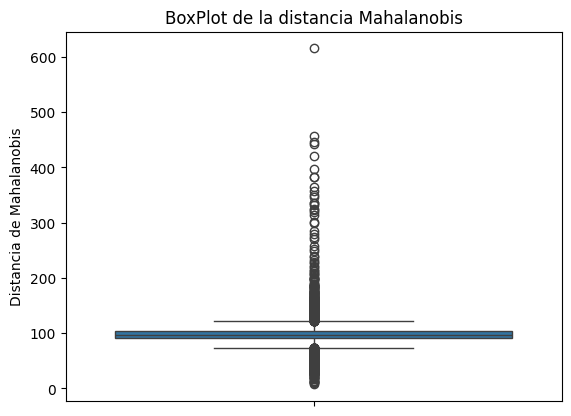

In [ ]:
sns.boxplot(y = muestra.mahalanobis_total_amount_trip_distance)
plt.title("BoxPlot de la distancia Mahalanobis")
plt.ylabel("Distancia de Mahalanobis")
plt.show()

In [ ]:
muestra["mahalanobis_total_amount_trip_distance"].describe()

,mahalanobis_total_amount_trip_distance
count,10000.000000
mean,99.123799
std,21.342124
min,7.430731
25%,91.914673
50%,97.244292
75%,104.152521
max,615.596945


Como podemos observar, la mayoria de los valores de la variable mahalanobis, se concentran entre $91.9$ y $104.2$

In [ ]:
percentil = muestra["mahalanobis_total_amount_trip_distance"].quantile(0.990)
print(f"Tomaremos el percentil 99% como umbral, lo que corresponde a un valor de {percentil:.2f}")


Tomaremos el percentil 99% como umbral, lo que corresponde a un valor de 159.53


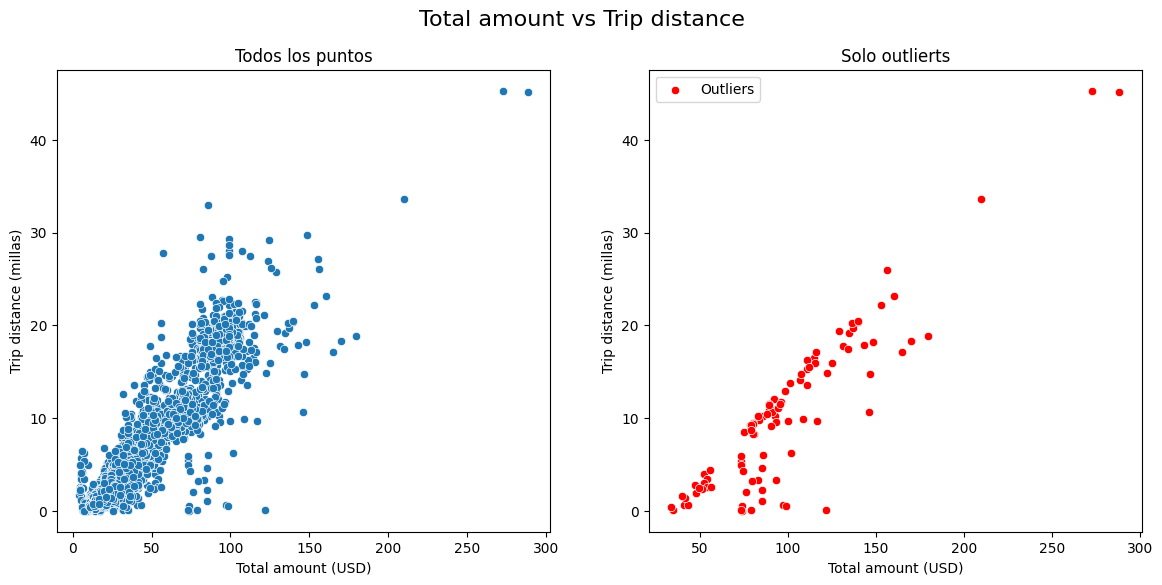

In [ ]:
maha = muestra[muestra['mahalanobis_total_amount_trip_distance'] > percentil]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot( x = muestra.total_amount, y = muestra.trip_distance, ax=axes[0])
axes[0].set_title("Todos los puntos")
axes[0].set_xlabel("Total amount (USD)")
axes[0].set_ylabel("Trip distance (millas)")

sns.scatterplot(x = maha.total_amount, y = maha.trip_distance, ax=axes[1], color = "red", label="Outliers")
axes[1].set_title("Solo outlierts")
axes[1].set_xlabel("Total amount (USD)")
axes[1].set_ylabel("Trip distance (millas)")

plt.suptitle("Total amount vs Trip distance", fontsize=16)

plt.show()

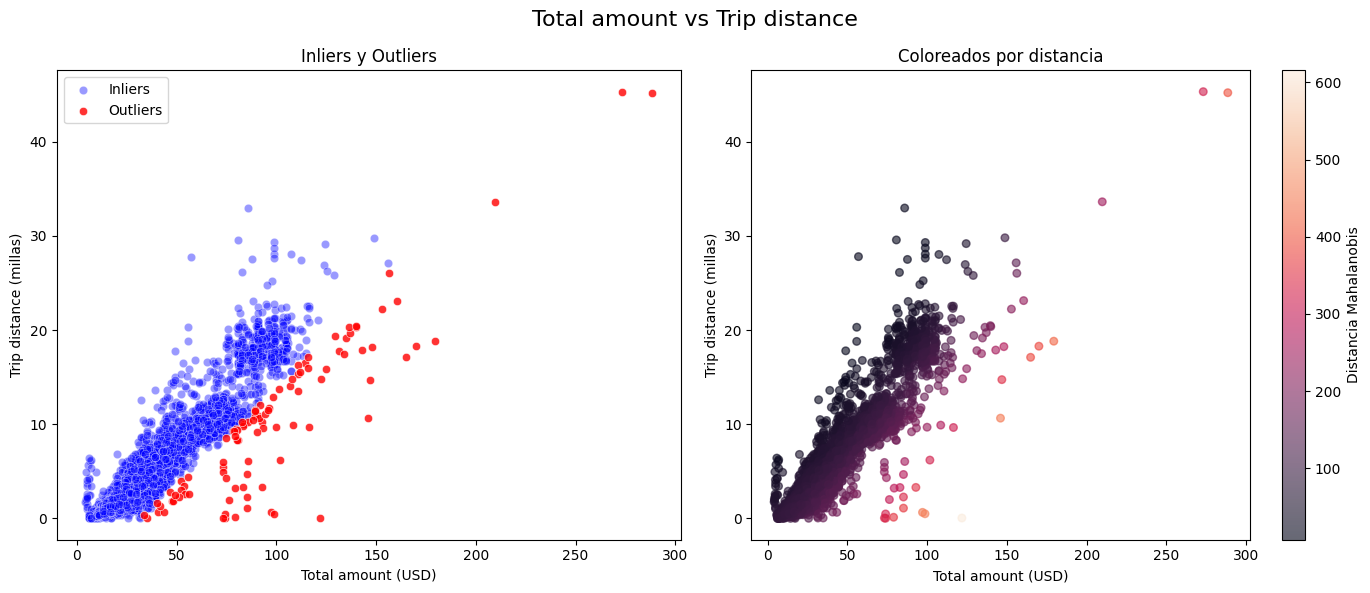

In [ ]:
inliers = muestra[muestra['mahalanobis_total_amount_trip_distance'] <= percentil]
outliers = muestra[muestra['mahalanobis_total_amount_trip_distance'] > percentil]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x = inliers.total_amount, y = inliers.trip_distance, color="blue", ax = axes[0], alpha = 0.4, label = "Inliers")
sns.scatterplot(x = outliers.total_amount, y = outliers.trip_distance, color="red", ax = axes[0], alpha = 0.8, label = "Outliers")
axes[0].set_title("Inliers y Outliers")
axes[0].set_xlabel("Total amount (USD)")
axes[0].set_ylabel("Trip distance (millas)")

sc = axes[1].scatter(x = muestra["total_amount"], y = muestra["trip_distance"], c = muestra["mahalanobis_total_amount_trip_distance"], cmap = "rocket", s = 30, alpha = 0.6)
fig.colorbar(sc, ax = axes[1], label = "Distancia Mahalanobis")
axes[1].set_title("Coloreados por distancia")
axes[1].set_xlabel("Total amount (USD)")
axes[1].set_ylabel("Trip distance (millas)")

plt.suptitle("Total amount vs Trip distance", fontsize=16)

plt.tight_layout()
plt.show()

#### Analisis de *total_amount* vs *fare_amount* .

In [ ]:
vmedias = np.mean(muestra[["fare_amount", "total_amount"]])

x_dif = muestra[["fare_amount", "total_amount"]] - vmedias

cov = muestra[["fare_amount", "total_amount"]].cov().values
inv_cov = np.linalg.inv(cov)

mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

muestra["mahalanobis_total_amount_fare_amount"] = mahal.diagonal()

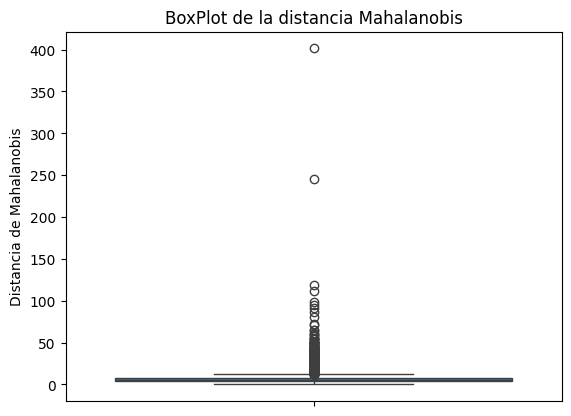

In [ ]:
sns.boxplot(y = muestra.mahalanobis_total_amount_fare_amount)
plt.title("BoxPlot de la distancia Mahalanobis")
plt.ylabel("Distancia de Mahalanobis")
plt.show()

In [ ]:
muestra["mahalanobis_total_amount_fare_amount"].describe()

,mahalanobis_total_amount_fare_amount
count,10000.000000
mean,7.152866
std,8.237666
min,0.061925
25%,4.360415
50%,5.835657
75%,7.561652
max,401.554012


Como podemos observar, la mayoria de los valores de la variable mahalanobis, se concentran entre $4.36$ y $7.56$

In [ ]:
percentil = muestra["mahalanobis_total_amount_fare_amount"].quantile(0.990)
print(f"Tomaremos el percentil 99% como umbral, lo que corresponde a un valor de {percentil:.2f}")

Tomaremos el percentil 99% como umbral, lo que corresponde a un valor de 36.57


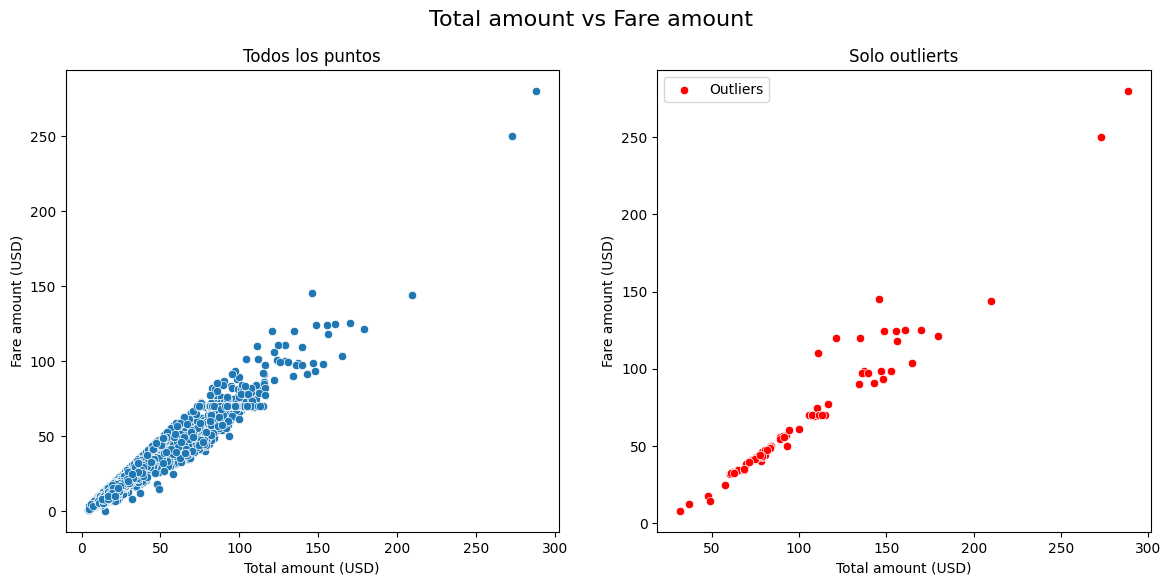

In [ ]:
maha = muestra[muestra['mahalanobis_total_amount_fare_amount'] > percentil]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot( x = muestra.total_amount, y = muestra.fare_amount, ax=axes[0])
axes[0].set_title("Todos los puntos")
axes[0].set_xlabel("Total amount (USD)")
axes[0].set_ylabel("Fare amount (USD)")

sns.scatterplot(x = maha.total_amount, y = maha.fare_amount, ax=axes[1], color = "red", label="Outliers")
axes[1].set_title("Solo outlierts")
axes[1].set_xlabel("Total amount (USD)")
axes[1].set_ylabel("Fare amount (USD)")

plt.suptitle("Total amount vs Fare amount", fontsize=16)

plt.show()

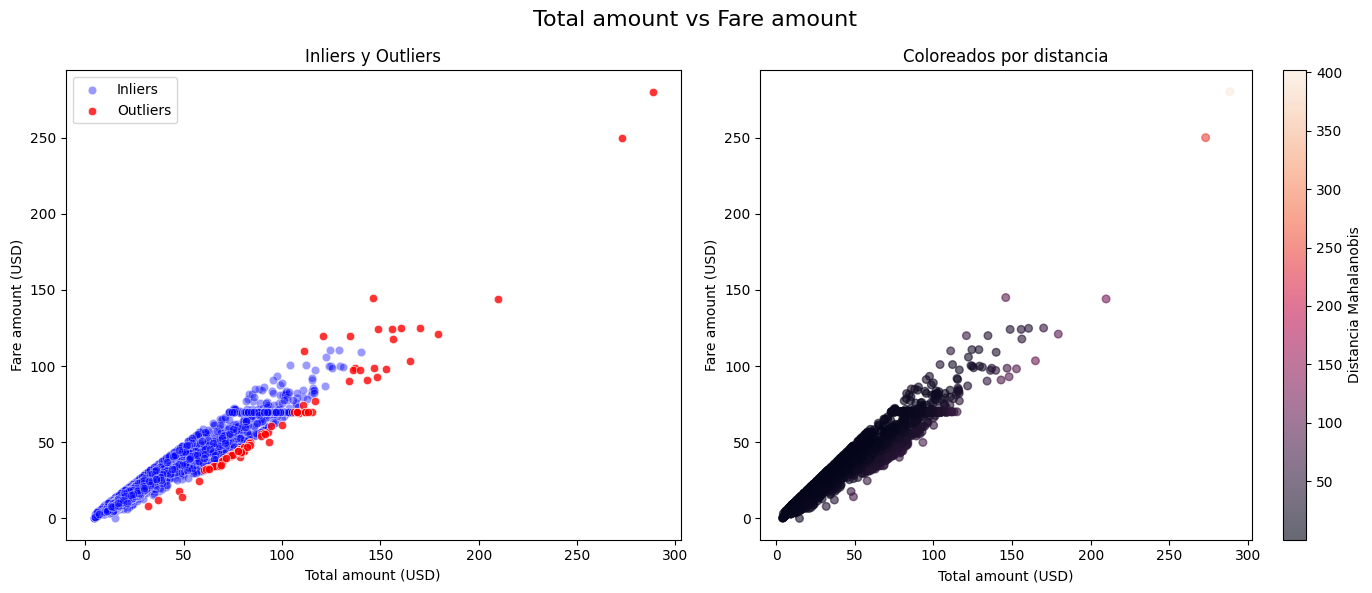

In [ ]:
inliers = muestra[muestra['mahalanobis_total_amount_fare_amount'] <= percentil]
outliers = muestra[muestra['mahalanobis_total_amount_fare_amount'] > percentil]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x = inliers.total_amount, y = inliers.fare_amount, color="blue", ax = axes[0], alpha = 0.4, label = "Inliers")
sns.scatterplot(x = outliers.total_amount, y = outliers.fare_amount, color="red", ax = axes[0], alpha = 0.8, label = "Outliers")
axes[0].set_title("Inliers y Outliers")
axes[0].set_xlabel("Total amount (USD)")
axes[0].set_ylabel("Fare amount (USD)")

sc = axes[1].scatter(x = muestra["total_amount"], y = muestra["fare_amount"], c = muestra["mahalanobis_total_amount_fare_amount"], cmap = "rocket", s = 30, alpha = 0.6)
fig.colorbar(sc, ax = axes[1], label = "Distancia Mahalanobis")
axes[1].set_title("Coloreados por distancia")
axes[1].set_xlabel("Total amount (USD)")
axes[1].set_ylabel("Fare amount (USD)")

plt.suptitle("Total amount vs Fare amount", fontsize=16)

plt.tight_layout()
plt.show()

## Eliminación de columnas

In [5]:
# Cargamos los datos ya filtrados:
trips_filtrados = pd.read_csv("/content/datos_filtrados.csv")

In [7]:
# Eliminamos las columnas que no van a ser utilizadas en la siguiente parte del trabajo.
trips_filtrados_columns = trips_filtrados.drop(['VendorID','store_and_fwd_flag', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge'], axis=1)

## Creación de Features

In [5]:
# Cargamos los datos ya filtrados:
trips_features = pd.read_csv("/content/trips_filtrados_columnas.csv")

#### Creamos la variable *pickup_time_of_day* que tengra los siguentes valores:


*   Si el viaje empieza entre las $06:00$ y $11:59$ → morning.
*   Si el viaje empieza entre las $12:00$ y $17:59$ → afternoon.
*   Si el viaje empieza entre las $18:00$ y $23:59$ → evening.
*   Si el viaje empieza entre las $00:00$ y $05:59$ → early_morning.


In [8]:
trips_features["tpep_pickup_datetime"] = pd.to_datetime(trips_features["tpep_pickup_datetime"], errors="coerce")
hora = trips_features['tpep_pickup_datetime'].dt.hour

condiciones = [
    (hora >= 0)  & (hora < 6),
    (hora >= 6)  & (hora < 12),
    (hora >= 12) & (hora < 18),
    (hora >= 18) & (hora <= 23)
]
valores = ["early_morning", "morning", "afternoon", "evening"]

trips_features["pickup_time_of_day"] = np.select(condiciones, valores, default='unknown')

In [9]:
# Visualizamos la cantidad de valores en pickup_time_of_day

trips_features['pickup_time_of_day'].value_counts()

,count
pickup_time_of_day,
afternoon,3218722
evening,3085225
morning,1935789
early_morning,703610


#### Creamos la variable *trip_distance_category* que tengra los siguentes valores:

*   Si el viaje tiene una distancia menor a $5$ millas → short_distance.
*   Si el viaje tiene una distancia entre $5$ y $10$ millas → medium_distance.
*   Si el viaje tiene una distancia mayor a $10$ millas. → large_distance.

In [10]:
distancia = trips_features['trip_distance']

condiciones = [
    (distancia < 5),
    (distancia >= 5)  & (distancia < 10),
    (distancia >= 10)
]
valores = ["short_distance", "medium_distance", "large_distance"]

trips_features["trip_distance_category"] = np.select(condiciones, valores, default='unknown')

In [11]:
# Visualizamos la cantidad de valores en trip_distance_category

trips_features['trip_distance_category'].value_counts()

,count
trip_distance_category,
short_distance,7496325
medium_distance,757008
large_distance,690013


#### Creamos la variable *day_of_week* que tengra los siguentes valores:

*   Si el viaje empezo un día lunes → monday .
*   Si el viaje empezo un día martes → thursday.
*   Si el viaje empezo un día miercoles → wednesday.
*   Si el viaje empezo un día jueves → tuesday
*   Si el viaje empezo un día viernes → friday
*   Si el viaje empezo un día sabado → saturday
*   Si el viaje empezo un día domingo → sunday

In [12]:
trips_features["day_of_week"] = trips_features["tpep_pickup_datetime"].dt.day_name().str.lower()

In [13]:
# Visualizamos la cantidad de valores en day_of_week

trips_features["day_of_week"].value_counts()

,count
day_of_week,
thursday,1448760
saturday,1393983
friday,1345179
wednesday,1341508
tuesday,1219208
sunday,1133539
monday,1061169


#### Creamos la variable *holiday_or_weekend* que tengra los siguentes valores:

*   Si el viaje se realizo un día sabado, domingo o feriado → Y .
*   Si el viaje se realizo en cualquier otro día → N.


In [14]:
dias_de_descanso = trips_features['day_of_week']
fechas_de_descanso = trips_features['tpep_pickup_datetime'].dt.date

feriados = pd.to_datetime(['2024-01-01', '2024-01-15', '2024-02-19']).date
condiciones = [
    (dias_de_descanso.isin(["saturday", "sunday"])),
    (fechas_de_descanso.isin(feriados))
]
valores = ["Y", "Y"]
trips_features["holiday_or_weekend"] = np.select(condiciones, valores, default='N')


In [15]:
# Visualizamos la cantidad de valores en holiday_or_weekend

trips_features["holiday_or_weekend"].value_counts()

,count
holiday_or_weekend,
N,6199034
Y,2744312


# Preguntas que suguieron a lo largo del trabajo - Se analizará en el reporte

#### ¿Qué variables son más influyentes para incrementar el costo final de un viaje en taxi?

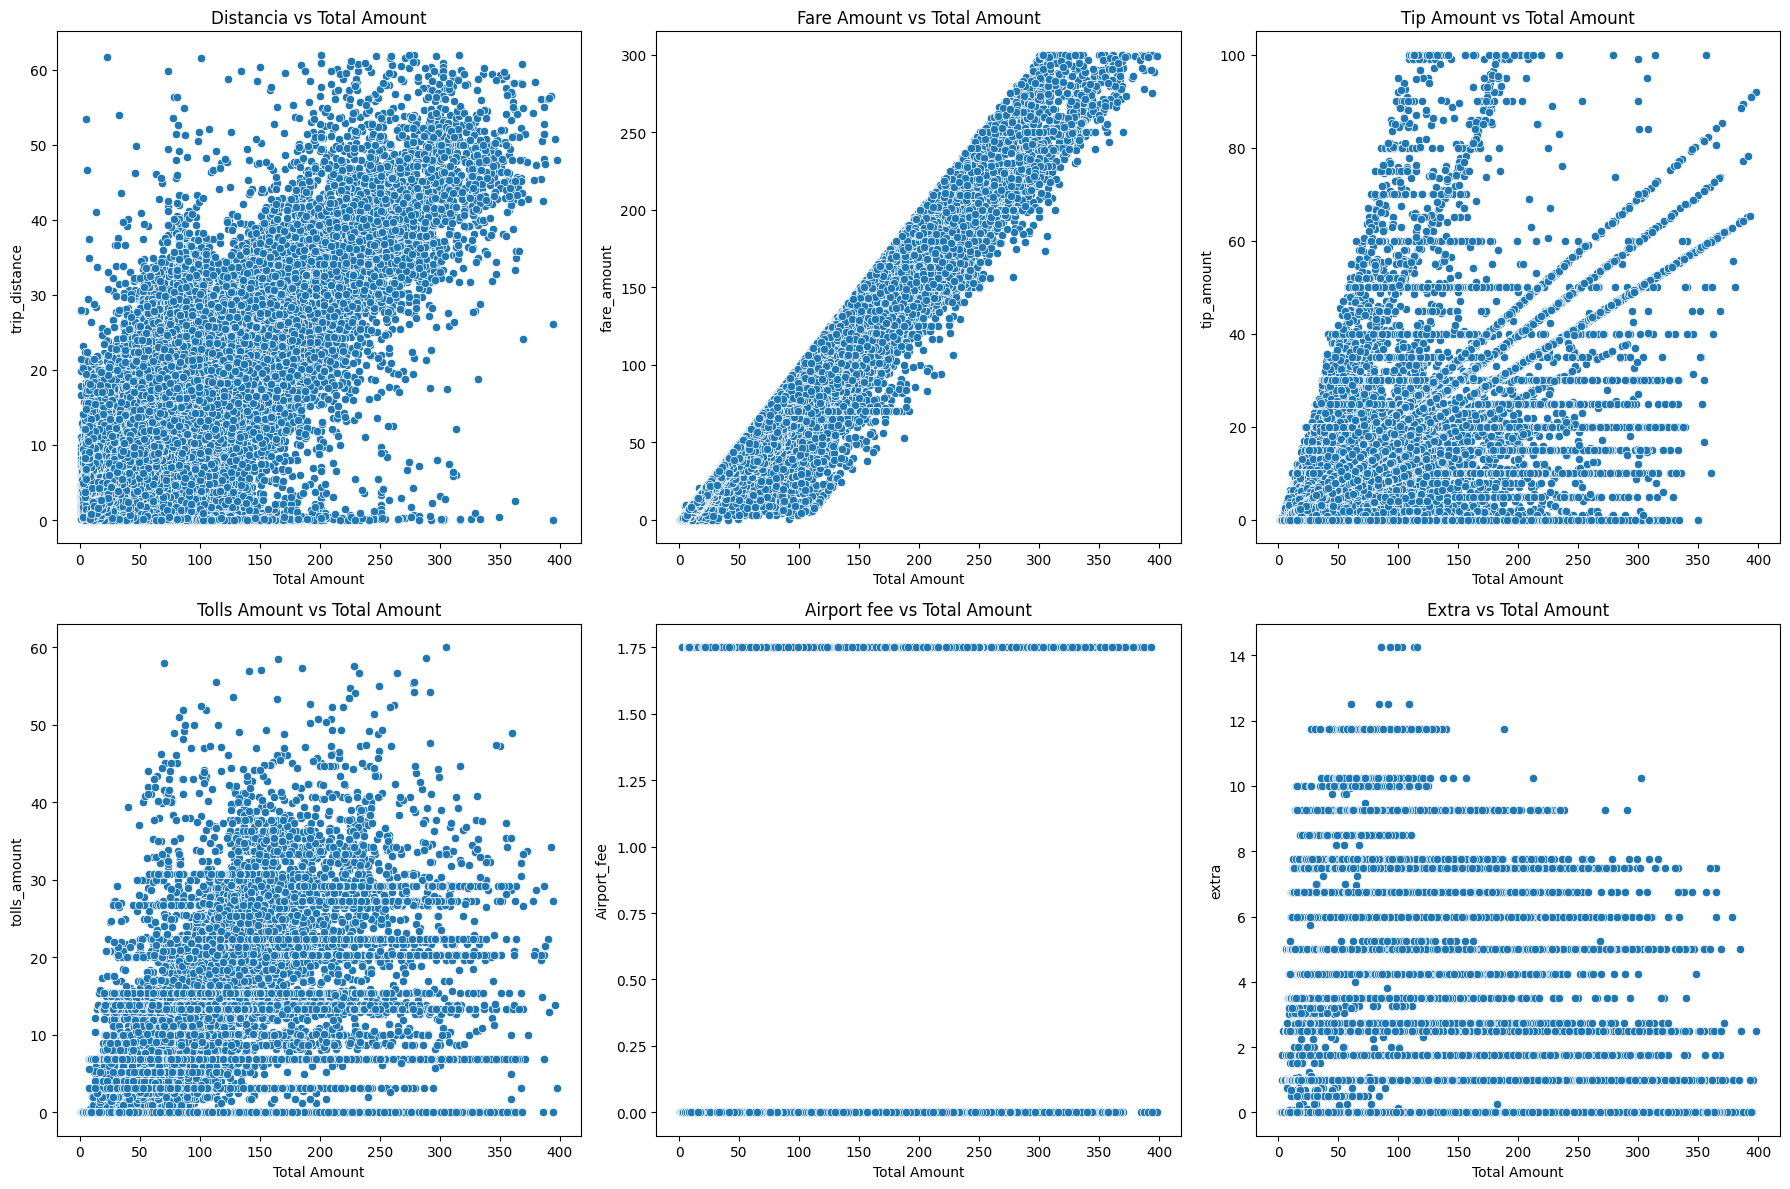

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

sns.scatterplot(data = trips_features, x = 'total_amount', y = 'trip_distance',ax = axes[0])
sns.scatterplot(data = trips_features, x = 'total_amount', y = 'fare_amount',ax = axes[1])
sns.scatterplot(data = trips_features, x = 'total_amount', y = 'tip_amount',ax = axes[2])
sns.scatterplot(data = trips_features, x = 'total_amount', y = 'tolls_amount',ax = axes[3])
sns.scatterplot(data = trips_features, x = 'total_amount', y = 'Airport_fee',ax = axes[4])
sns.scatterplot(data = trips_features, x = 'total_amount', y = 'extra',ax = axes[5])

titles = [
    "Distancia vs Total Amount",
    "Fare Amount vs Total Amount",
    "Tip Amount vs Total Amount",
    "Tolls Amount vs Total Amount",
    "Airport fee vs Total Amount",
    "Extra vs Total Amount"
]

for ax, title in zip(axes, titles):
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Total Amount")

plt.tight_layout()
plt.show()

#### ¿En qué franja horaria (madrugada, mañana, tarde, noche) los taxistas obtienen mayores ingresos promedio por viaje?

In [16]:
ingreso_early_morning = trips_features[trips_features['pickup_time_of_day'] == "early_morning"][['pickup_time_of_day','total_amount']]
ingreso_morning = trips_features[trips_features['pickup_time_of_day'] == "morning"][['pickup_time_of_day','total_amount']]
ingreso_afternoon = trips_features[trips_features['pickup_time_of_day'] == "afternoon"][['pickup_time_of_day','total_amount']]
ingreso_evening = trips_features[trips_features['pickup_time_of_day'] == "evening"][['pickup_time_of_day','total_amount']]

In [17]:
ingreso_total_early_morning = ingreso_early_morning["total_amount"].sum()
ingreso_total_morning = ingreso_morning["total_amount"].sum()
ingreso_total_afternoon = ingreso_afternoon["total_amount"].sum()
ingreso_total_evening = ingreso_evening["total_amount"].sum()

ingreso_promedio_por_viaje_early_morning = ingreso_total_early_morning/ingreso_early_morning.shape[0]
ingreso_promedio_por_viaje_morning = ingreso_total_morning/ingreso_morning.shape[0]
ingreso_promedio_por_viaje_afternoon = ingreso_total_afternoon/ingreso_afternoon.shape[0]
ingreso_promedio_por_viaje_evening = ingreso_total_evening/ingreso_evening.shape[0]

print(f"El ingreso total de los viajes realizados en la madrugada son: {ingreso_total_early_morning:.2f}")
print(f"El ingreso total de los viajes realizados en la mañana son: {ingreso_total_morning:.2f}")
print(f"El ingreso total de los viajes realizados en la tarde son: {ingreso_total_afternoon:.2f}")
print(f"El ingreso total de los viajes realizados en la noche son: {ingreso_total_evening:.2f}")

print()

print(f"El ingreso promedio por viaje en la madrugada es: {ingreso_promedio_por_viaje_early_morning:.2f}")
print(f"El ingreso promedio por viaje en la mañana es: {ingreso_promedio_por_viaje_morning:.2f}")
print(f"El ingreso promedio por viaje en la tarde es: {ingreso_promedio_por_viaje_afternoon:.2f}")
print(f"El ingreso promedio por viaje en la noche es: {ingreso_promedio_por_viaje_evening:.2f}")


El ingreso total de los viajes realizados en la madrugada son: 19247715.08
El ingreso total de los viajes realizados en la mañana son: 50948573.58
El ingreso total de los viajes realizados en la tarde son: 91002078.71
El ingreso total de los viajes realizados en la noche son: 84859566.70

El ingreso promedio por viaje en la madrugada es: 27.36
El ingreso promedio por viaje en la mañana es: 26.32
El ingreso promedio por viaje en la tarde es: 28.27
El ingreso promedio por viaje en la noche es: 27.51


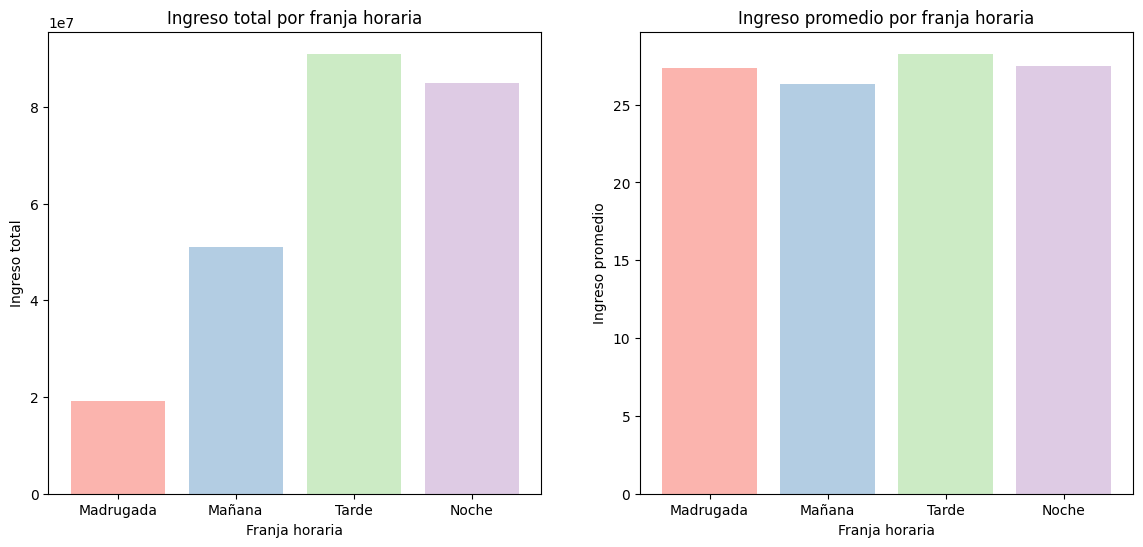

In [18]:
labels = ["Madrugada", "Mañana", "Tarde", "Noche"]
colores =  plt.cm.Pastel1.colors

ingresos_totales = [
    ingreso_total_early_morning,
    ingreso_total_morning,
    ingreso_total_afternoon,
    ingreso_total_evening]

ingresos_promedio = [
  ingreso_promedio_por_viaje_early_morning,
  ingreso_promedio_por_viaje_morning,
  ingreso_promedio_por_viaje_afternoon,
  ingreso_promedio_por_viaje_evening]

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

axes[0].bar(labels, ingresos_totales, color = colores[:4])
axes[0].set_title("Ingreso total por franja horaria")
axes[0].set_xlabel("Franja horaria")
axes[0].set_ylabel("Ingreso total")

axes[1].bar(labels, ingresos_promedio, color = colores[:4])
axes[1].set_title("Ingreso promedio por franja horaria")
axes[1].set_xlabel("Franja horaria")
axes[1].set_ylabel("Ingreso promedio")

plt.show()

#### ¿Qué proporción de los viajes se produce en cada horario del día (madrugada, mañana, tarde y noche)?

In [38]:
print(f"La cantidad total de viajes realizados en la madrugada son: {ingreso_early_morning.shape[0]:.2f}")
print(f"La cantidad total de viajes realizados en la mañana son: {ingreso_morning.shape[0]:.2f}")
print(f"La cantidad total de viajes realizados en la tarde son: {ingreso_afternoon.shape[0]:.2f}")
print(f"La cantidad total de viajes realizados en la noche son: {ingreso_evening.shape[0]:.2f}")

La cantidad total de viajes realizados en la madrugada son: 703610.00
La cantidad total de viajes realizados en la mañana son: 1935789.00
La cantidad total de viajes realizados en la tarde son: 3218722.00
La cantidad total de viajes realizados en la noche son: 3085225.00


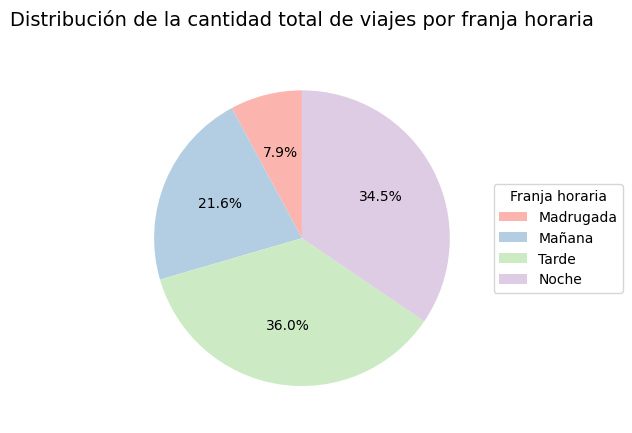

In [39]:
etiquetas = ["Madrugada", "Mañana", "Tarde", "Noche"]
colores =  plt.cm.Pastel1.colors

cantidad_total = [
  ingreso_early_morning.shape[0],
  ingreso_morning.shape[0],
  ingreso_afternoon.shape[0],
  ingreso_evening.shape[0]]

wedges = plt.pie(
    x=cantidad_total,
    autopct="%1.1f%%",
    startangle=90,
    colors=colores
)
plt.legend(wedges[0], etiquetas, title="Franja horaria", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribución de la cantidad total de viajes por franja horaria", fontsize=14, pad=20)
plt.show()

#### ¿En qué horario y día de la semana los pasajeros dejan propinas más generosas en proporción a lo que pagan?

In [22]:
trips_features.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'Airport_fee', 'pickup_time_of_day',
       'trip_distance_category', 'day_of_week', 'holiday_or_weekend'],
      dtype='object')

In [23]:
propinas_horas_pago = trips_features[["tpep_pickup_datetime", "fare_amount","tip_amount","day_of_week"]].copy()
propinas_horas_pago["hour"] = propinas_horas_pago["tpep_pickup_datetime"].dt.hour
propinas_horas_pago["tip_for_fare_amount"] = propinas_horas_pago["tip_amount"] / propinas_horas_pago["fare_amount"]

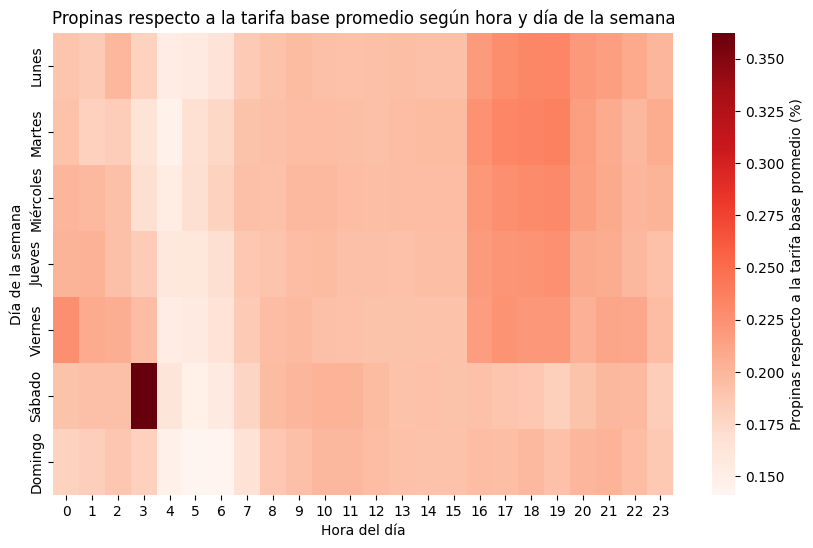

In [24]:
dias_orden = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
dias_esp = {
    "monday": "Lunes",
    "tuesday": "Martes",
    "wednesday": "Miércoles",
    "thursday": "Jueves",
    "friday": "Viernes",
    "saturday": "Sábado",
    "sunday": "Domingo"
}

agrupar_por_dia_hora_promedio = propinas_horas_pago.groupby(["day_of_week", "hour"])["tip_for_fare_amount"].mean().reset_index()
tabla_agrupar_por_dia_hora_promedio = agrupar_por_dia_hora_promedio.pivot(index="day_of_week", columns="hour", values="tip_for_fare_amount")
tabla_agrupar_por_dia_hora_promedio = tabla_agrupar_por_dia_hora_promedio.reindex(index=dias_orden)
tabla_agrupar_por_dia_hora_promedio.rename(index=dias_esp, inplace = True)

plt.figure(figsize = (10, 6))

sns.heatmap(tabla_agrupar_por_dia_hora_promedio, cmap = "Reds", annot = False, cbar_kws = {'label': 'Propinas respecto a la tarifa base promedio (%)'})

plt.title("Propinas respecto a la tarifa base promedio según hora y día de la semana")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()

#### ¿Los taxistas obtienen mayores ingresos por viajes cortos (distancia menor a 5 millas), viajes medianos (distancia mayor o igual a 5 millas y menor a 10 millas) o viajes largos (distancia mayor a 10 millas)?


In [25]:
distancia_corta = trips_features[trips_features['trip_distance_category'] == "short_distance"][['trip_distance_category','total_amount','trip_distance']]
distancia_mediana = trips_features[trips_features['trip_distance_category'] == "medium_distance"][['trip_distance_category','total_amount','trip_distance']]
distancia_larga = trips_features[trips_features['trip_distance_category'] == "large_distance"][['trip_distance_category','total_amount','trip_distance']]

In [26]:
distancia_corta["price_for_mile"] = (distancia_corta["total_amount"] / distancia_corta["trip_distance"])
distancia_mediana["price_for_mile"] = (distancia_mediana["total_amount"] / distancia_mediana["trip_distance"])
distancia_larga["price_for_mile"] = (distancia_larga["total_amount"] / distancia_larga["trip_distance"])

In [27]:
ingreso_total_por_distancia_corta = distancia_corta["total_amount"].sum()
ingreso_total_por_distancia_mediana = distancia_mediana["total_amount"].sum()
ingreso_total_por_distancia_larga = distancia_larga["total_amount"].sum()

ingreso_promedio_por_distancia_corta = ingreso_total_por_distancia_corta/distancia_corta.shape[0]
ingreso_promedio_por_distancia_mediana = ingreso_total_por_distancia_mediana/distancia_mediana.shape[0]
ingreso_promedio_por_distancia_larga = ingreso_total_por_distancia_larga/distancia_larga.shape[0]


print(f"El ingreso total de viajes cortos son: {ingreso_total_por_distancia_corta:.2f}")
print(f"El ingreso total de viajes medianos son: {ingreso_total_por_distancia_mediana:.2f}")
print(f"El ingreso total de viajes largos son: {ingreso_total_por_distancia_larga:.2f}")

print()

print(f"La ingreso promedio de los viajes cortos son: {ingreso_promedio_por_distancia_corta:.2f}")
print(f"La ingreso promedio de los viajes medianos son: {ingreso_promedio_por_distancia_mediana:.2f}")
print(f"La ingreso promedio de los viajes largos son: {ingreso_promedio_por_distancia_larga:.2f}")



El ingreso total de viajes cortos son: 151305253.24
El ingreso total de viajes medianos son: 35816731.19
El ingreso total de viajes largos son: 58935949.64

La ingreso promedio de los viajes cortos son: 20.18
La ingreso promedio de los viajes medianos son: 47.31
La ingreso promedio de los viajes largos son: 85.41


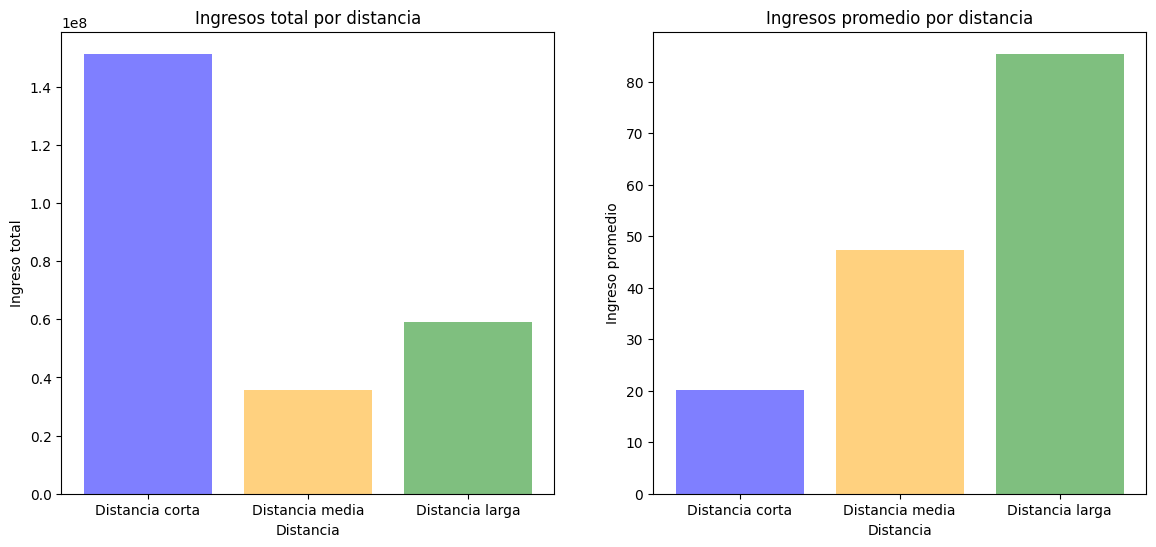

In [28]:
labels = ["Distancia corta", "Distancia media", "Distancia larga"]
colores = ["blue", "orange", "green"]


ingresos_por_distancia_totales = [
  ingreso_total_por_distancia_corta,
  ingreso_total_por_distancia_mediana,
  ingreso_total_por_distancia_larga]

ingresos_promedio_por_distancia = [
  ingreso_promedio_por_distancia_corta,
  ingreso_promedio_por_distancia_mediana,
  ingreso_promedio_por_distancia_larga]

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

axes[0].bar(labels, ingresos_por_distancia_totales, color = colores[:3], alpha = 0.5)
axes[0].set_title("Ingresos total por distancia")
axes[0].set_xlabel("Distancia")
axes[0].set_ylabel("Ingreso total")

axes[1].bar(labels, ingresos_promedio_por_distancia, color = colores[:3], alpha = 0.5)
axes[1].set_title("Ingresos promedio por distancia")
axes[1].set_xlabel("Distancia")
axes[1].set_ylabel("Ingreso promedio")

plt.show()

In [29]:
ingreso_por_milla_total_distancia_corta = distancia_corta["price_for_mile"].sum()
ingreso_por_milla_total_distancia_mediana = distancia_mediana["price_for_mile"].sum()
ingreso_por_milla_total_distancia_larga = distancia_larga["price_for_mile"].sum()

ingreso_por_milla_promedio_distancia_corta = ingreso_por_milla_total_distancia_corta/distancia_corta.shape[0]
ingreso_por_milla_promedio_distancia_mediana = ingreso_por_milla_total_distancia_mediana/distancia_mediana.shape[0]
ingreso_por_milla_promedio_distancia_larga = ingreso_por_milla_total_distancia_larga/distancia_larga.shape[0]


print(f"El ingreso por milla total de viajes cortos son: {ingreso_por_milla_total_distancia_corta:.2f}")
print(f"El ingreso por milla total de viajes medianos son: {ingreso_por_milla_total_distancia_mediana:.2f}")
print(f"El ingreso por milla total de viajes largos son: {ingreso_por_milla_total_distancia_larga:.2f}")

print()

print(f"La ingreso por milla promedio de los viajes cortos son: {ingreso_por_milla_promedio_distancia_corta:.2f}")
print(f"La ingreso por milla promedio de los viajes medianos son: {ingreso_por_milla_promedio_distancia_mediana:.2f}")
print(f"La ingreso por milla promedio de los viajes largos son: {ingreso_por_milla_promedio_distancia_larga:.2f}")


El ingreso por milla total de viajes cortos son: 146704529.98
El ingreso por milla total de viajes medianos son: 4972712.83
El ingreso por milla total de viajes largos son: 3784059.55

La ingreso por milla promedio de los viajes cortos son: 19.57
La ingreso por milla promedio de los viajes medianos son: 6.57
La ingreso por milla promedio de los viajes largos son: 5.48


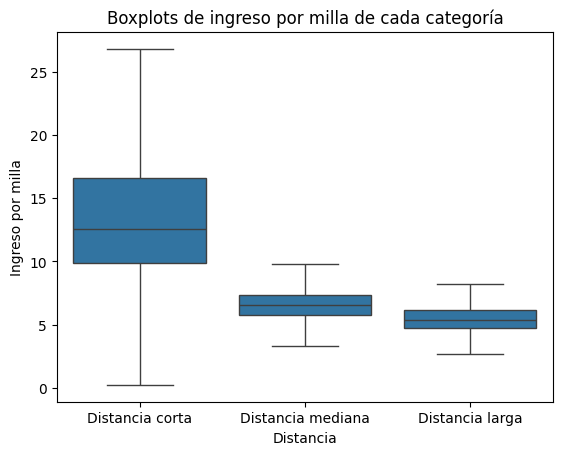

In [30]:
clasificaciones = pd.concat([distancia_corta, distancia_mediana, distancia_larga])
colores = ["blue", "orange", "green"]
sns.boxplot(data = clasificaciones, x = 'trip_distance_category', y = 'price_for_mile', showfliers=False)

plt.xlabel('Distancia')
plt.ylabel('Ingreso por milla')
plt.xticks([0,1,2], ['Distancia corta', 'Distancia mediana', 'Distancia larga'])
plt.title('Boxplots de ingreso por milla de cada categoría')

plt.show()

#### ¿Los viajes iniciados desde los aeropuertos de LaGuardia o John F. Kennedy son más frecuentes en fines de semana o feriados?


In [31]:
aeropuerto = trips_features[ (trips_features['PULocationID'].isin([132,138]))][['holiday_or_weekend','PULocationID','DOLocationID']]

In [32]:
aeropuerto['holiday_or_weekend'].value_counts()

,count
holiday_or_weekend,
N,487510
Y,213990


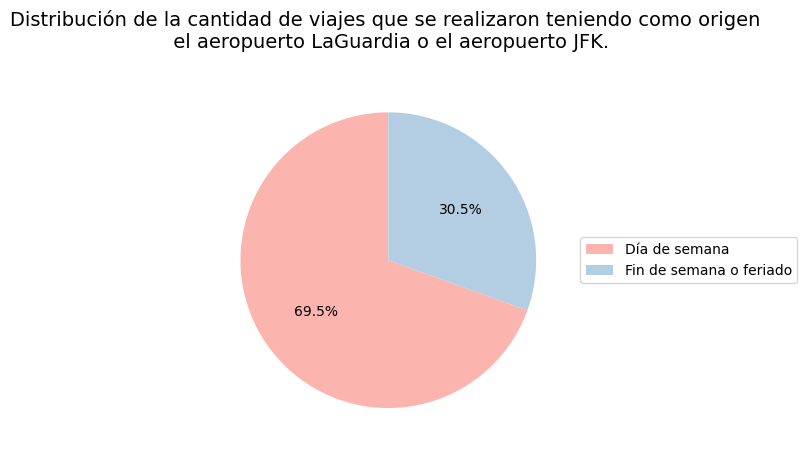

In [33]:
etiquetas = ["Día de semana", "Fin de semana o feriado"]
colores =  plt.cm.Pastel1.colors

wedges = plt.pie(
    x = aeropuerto['holiday_or_weekend'].value_counts(),
    autopct="%1.1f%%",
    startangle=90,
    colors=colores
)
plt.legend(wedges[0], etiquetas, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribución de la cantidad de viajes que se realizaron teniendo como origen \n el aeropuerto LaGuardia o el aeropuerto JFK.", fontsize=14, pad=20)
plt.show()

In [34]:
# Contabilizamos los dias de semana
inicio = "2024-01-01"
final = "2024-03-31"

dias_totales = pd.date_range(inicio, final, freq = "D")
dias_de_semana = dias_totales[dias_totales.weekday < 5]
fines_de_semana = dias_totales[dias_totales.weekday >= 5]

# Se suman 3 dias a cant_fines_de_semana_feriados para contabilizar los feriados.
cant_dias_de_semana = len(dias_de_semana) - 3
cant_fines_de_semana_feriados = len(fines_de_semana) + 3

contador = aeropuerto["holiday_or_weekend"].value_counts()

viajes_promedio_fines_de_semana_feriados = contador.get("Y") / cant_fines_de_semana_feriados
viajes_en_dia_de_semana = contador.get("N") / cant_dias_de_semana

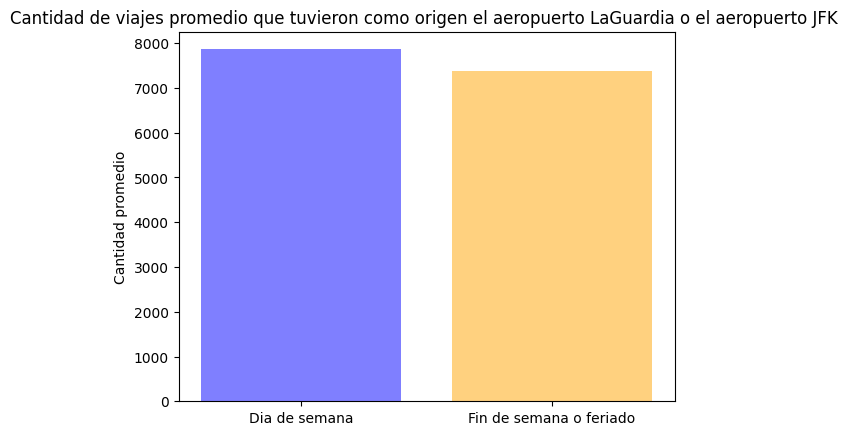

In [35]:
labels = ["Dia de semana", "Fin de semana o feriado"]
colores = ["blue", "orange"]

cantidad_de_viajes_promedio = [
  viajes_en_dia_de_semana,
  viajes_promedio_fines_de_semana_feriados]


plt.bar(labels, cantidad_de_viajes_promedio, color = colores, alpha = 0.5)
plt.title("Cantidad de viajes promedio que tuvieron como origen el aeropuerto LaGuardia o el aeropuerto JFK ")
plt.ylabel("Cantidad promedio")

plt.show()

#### ¿Cuáles son las zonas de destino más frecuentes en los viajes iniciados desde los aeropuertos de LaGuardia o John F. Kennedy?

In [36]:
import plotly.express as px

aeropuerto = pd.merge(aeropuerto,
                           taxi_zone[["LocationID","Borough","Zone"]],
                           left_on = "DOLocationID",
                           right_on = "LocationID",
                           how = "left")
aeropuerto = aeropuerto.drop(columns = ["LocationID"] )
aeropuerto = aeropuerto.rename(columns = {"Borough": "DOBorough","Zone": "DOZone"})

In [37]:
cantidad_de_destinos_por_zona = aeropuerto.groupby(['DOBorough','DOZone']).size().reset_index(name = 'Cantidad')
fig = px.treemap(
    cantidad_de_destinos_por_zona,
    path = ['DOBorough', 'DOZone'],
    values = 'Cantidad',
    title = 'Treemap de destinos seleccionados que parten de los aeropuertos LaGuardia y JKF')

fig.update_traces(
    texttemplate = "%{label}<br>%{value}",
    textfont_size = 18)

fig.show()